In [314]:
import pandas as pd
import numpy as np
from colorama import Fore, Back, Style
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import datetime
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [315]:
df_cable = pd.read_excel(io = 'cable2.xlsx', na_values = ['-', '无'], index_col = 0)

In [316]:
df_cable.replace(np.nan, str(np.nan), inplace=True) #convert nan to string 'nan'
df_cable = df_cable.astype({'Dapso Mat. Number': str, 'Nomination Date': str}) 
df_cable['Nomination Date'] = [i[:7] for i in df_cable['Nomination Date']] #remove day from date column

<font size="5">**Exploratory**</font>

In [317]:
#Descriptive summary of all variables
for i in range(0, len(df_cable.columns)-2):
    display(pd.DataFrame(df_cable.iloc[:,i].value_counts(dropna = False, normalize = True, ascending = False)))
    display(pd.DataFrame(df_cable.iloc[:,i]).describe())
    print(Back.YELLOW, '-'*60, Style.RESET_ALL)

,Life time years
7.0,0.15
5.0,0.12
6.1,0.11
3.1,0.07
6.7,0.07
8.0,0.06
4.4,0.05
6.0,0.05
5.6,0.04
4.8,0.03


,Life time years
count,100.00000
mean,5.99400
std,1.68258
min,2.90000
25%,5.00000
50%,6.10000
75%,7.00000
max,11.00000


 ------------------------------------------------------------ 


,Total volume life time pcs
574000.0,0.07
686080.0,0.06
300000.0,0.05
330000.0,0.04
283000.0,0.04
...,...
119606.0,0.01
1775946.0,0.01
1372160.0,0.01
3815259.0,0.01


,Total volume life time pcs
count,1.000000e+02
mean,3.009771e+06
std,1.030388e+07
min,3.849000e+03
25%,3.000000e+05
50%,5.740000e+05
75%,9.250000e+05
max,6.446800e+07


 ------------------------------------------------------------ 


,Volume mm³
3418.06,0.04
165719.93,0.02
233636.25,0.02
162670.24,0.02
46841.90,0.02
...,...
2609.83,0.01
68.53,0.01
5530.54,0.01
2120.97,0.01


,Volume mm³
count,100.000000
mean,87086.516000
std,123772.499115
min,68.530000
25%,2585.810000
50%,26996.195000
75%,163432.662500
max,503811.410000


 ------------------------------------------------------------ 


,Density g/cm³
1.250000,0.11
1.240000,0.10
1.100000,0.08
1.200000,0.07
1.220000,0.07
1.210000,0.05
1.050000,0.05
1.190000,0.05
1.300000,0.05
1.150000,0.03


,Density g/cm³
count,100.000000
mean,1.318917
std,0.306316
min,0.581000
25%,1.197500
50%,1.240000
75%,1.295970
max,2.180000


 ------------------------------------------------------------ 


,Surface Area mm²
8453.38,0.04
28196.05,0.02
110534.87,0.02
108935.74,0.02
36916.44,0.02
...,...
141083.88,0.01
1930.62,0.01
2586.03,0.01
1210.11,0.01


,Surface Area mm²
count,100.000000
mean,50567.033200
std,63030.832982
min,137.810000
25%,2902.475000
50%,19413.165000
75%,94601.477500
max,233718.550000


 ------------------------------------------------------------ 


,Minimum Box Dimensions L mm
56.44,0.04
196.23,0.02
74.88,0.02
178.57,0.02
218.48,0.02
...,...
284.38,0.01
79.86,0.01
49.34,0.01
268.94,0.01


,Minimum Box Dimensions L mm
count,100.000000
mean,132.154700
std,110.168097
min,8.990000
25%,52.750000
50%,83.495000
75%,203.882500
max,539.350000


 ------------------------------------------------------------ 


,Minimum Box Dimensions W mm
56.44,0.04
19.98,0.03
125.76,0.02
79.02,0.02
22.37,0.02
...,...
39.75,0.01
49.34,0.01
38.92,0.01
62.13,0.01


,Minimum Box Dimensions W mm
count,100.000000
mean,80.475900
std,60.331369
min,7.750000
25%,42.250000
50%,72.310000
75%,102.785000
max,391.930000


 ------------------------------------------------------------ 


,Minimum Box Dimensions H mm
6.45,0.06
8.40,0.04
9.00,0.02
10.00,0.02
92.43,0.02
...,...
84.70,0.01
40.00,0.01
5.47,0.01
5.27,0.01


,Minimum Box Dimensions H mm
count,100.000000
mean,42.591700
std,39.276977
min,2.000000
25%,7.650000
50%,20.350000
75%,79.767500
max,128.840000


 ------------------------------------------------------------ 


,Material Price /kg
0.00,0.15
18.00,0.09
60.00,0.08
21.00,0.08
18.50,0.07
140.00,0.05
19.00,0.05
120.00,0.04
23.00,0.04
20.00,0.04


,Material Price /kg
count,100.000000
mean,44.493300
std,48.661813
min,0.000000
25%,18.000000
50%,21.000000
75%,60.000000
max,202.000000


 ------------------------------------------------------------ 


,Nomination Date
2016-12,0.26
2017-01,0.20
2015-04,0.09
2016-04,0.07
2015-09,0.06
2016-10,0.04
2016-06,0.04
2016-02,0.03
2016-05,0.03
2014-04,0.03


,Nomination Date
count,100
unique,18
top,2016-12
freq,26


 ------------------------------------------------------------ 


,Category
Molded Duct,0.44
Buffer,0.15
Shaped Gasket_Regular Shape,0.12
Cut Gasket,0.10
Shaped Gasket_Irregular Shape,0.08
Membrane,0.06
O-ring,0.03
Extruded Hose,0.02


,Category
count,100
unique,8
top,Molded Duct
freq,44


 ------------------------------------------------------------ 


,Nominated Supplier
ZC,0.52
XY,0.21
SR,0.06
MC,0.04
DM,0.04
WT,0.04
TL,0.02
TY,0.02
FN,0.02
RR,0.01


,Nominated Supplier
count,100
unique,12
top,ZC
freq,52


 ------------------------------------------------------------ 


,Material Type
EPDM,0.26
AEM,0.18
FKM,0.16
NBR,0.16
LS-EPDM,0.08
NBR+PVC,0.06
HNBR,0.05
VMQ - LSR,0.02
EPDM foam,0.01
VMQ,0.01


,Material Type
count,100
unique,11
top,EPDM
freq,26


 ------------------------------------------------------------ 


,Hardness
70 +/- 5 Shore A,0.28
60 +/- 5 Shore A,0.21
75 +/- 5 Shore A,0.13
50 +/- 5 Shore A,0.08
40 +/- 5 Shore A,0.07
75 + 6 Shore A,0.05
nan,0.04
60 +/- 5 IRHD,0.03
55 +/- 5 Shore A,0.02
65 + 5 Shore A,0.02


,Hardness
count,100
unique,16
top,70 +/- 5 Shore A
freq,28


 ------------------------------------------------------------ 


,Color
Black,0.72
Non-black,0.06
nan,0.05
"Non-black, non-red, and non-ECRU",0.04
Non-black and non-grey,0.04
Green,0.03
Non-white and non-black,0.02
White,0.02
non-balck and non-grey,0.01
Red,0.01


,Color
count,100
unique,10
top,Black
freq,72


 ------------------------------------------------------------ 


,Material Spec
nan,0.27
GMN 10062,0.09
WSS-M2D470-A5,0.08
GMW 14720 Type A,0.06
DBL 6038.40,0.05
FIAT 55274/04 (MA 120-55),0.05
"GMW 14720 Type C, SAE J200 M2BF 708 E014, E034, Z1 - Z8",0.05
WSD-M2D447-A,0.04
GMW 14720 Type B,0.04
SAE J200M4CA710Z1Z2Z3Z4Z5Z6Z7,0.02


,Material Spec
count,100
unique,31
top,nan
freq,27


 ------------------------------------------------------------ 


,Dapso Mat. Number
nan,0.18
1663023478,0.09
1663023115,0.08
1663023022,0.06
1663023467,0.06
1663023466,0.06
1663023470,0.05
1663023714,0.05
1663023034,0.05
1663023999,0.05


,Dapso Mat. Number
count,100
unique,30
top,nan
freq,18


 ------------------------------------------------------------ 


 Life time years  



,Life time years
7.0,0.15
5.0,0.12
6.1,0.11
3.1,0.07
6.7,0.07
8.0,0.06
4.4,0.05
6.0,0.05
5.6,0.04
4.8,0.03


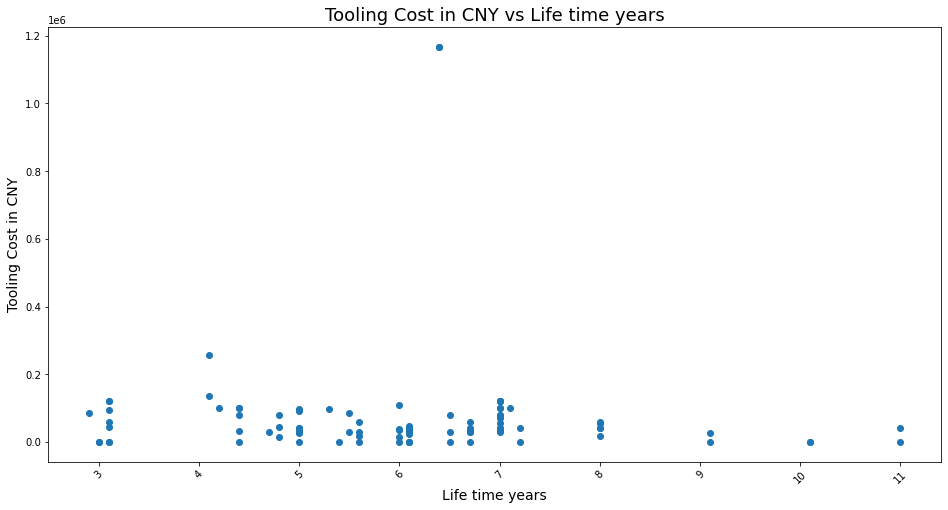



 Total volume life time pcs  



,Total volume life time pcs
574000.0,0.07
686080.0,0.06
300000.0,0.05
330000.0,0.04
283000.0,0.04
...,...
119606.0,0.01
1775946.0,0.01
1372160.0,0.01
3815259.0,0.01


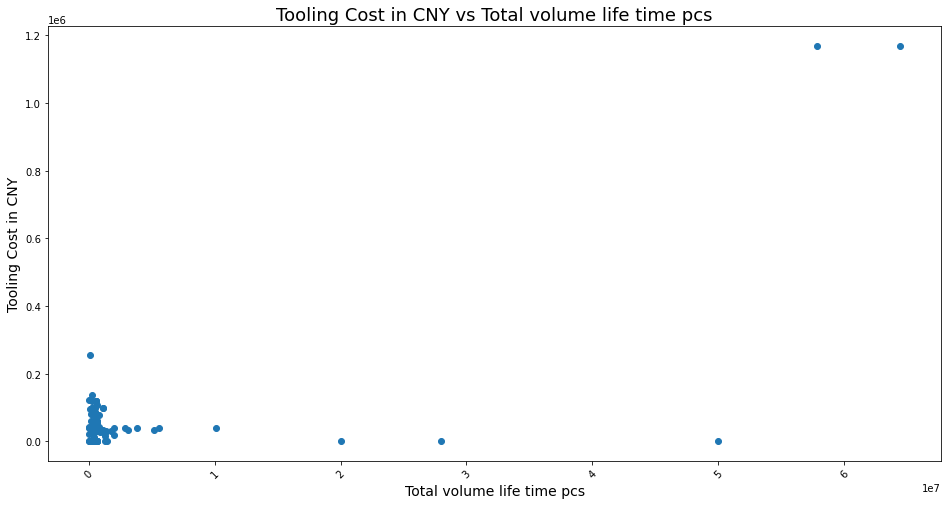



 Volume mm³  



,Volume mm³
3418.06,0.04
165719.93,0.02
233636.25,0.02
162670.24,0.02
46841.90,0.02
...,...
2609.83,0.01
68.53,0.01
5530.54,0.01
2120.97,0.01


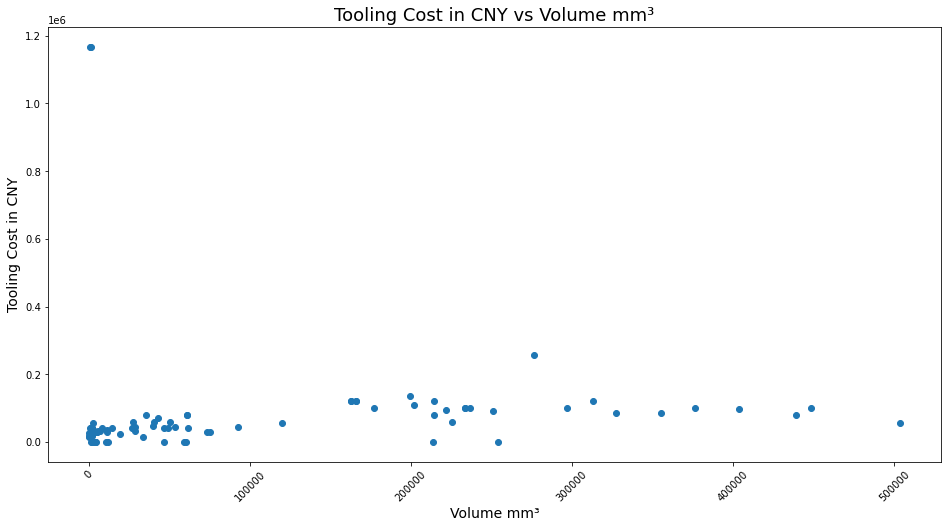



 Density g/cm³  



,Density g/cm³
1.250000,0.11
1.240000,0.10
1.100000,0.08
1.200000,0.07
1.220000,0.07
1.210000,0.05
1.050000,0.05
1.190000,0.05
1.300000,0.05
1.150000,0.03


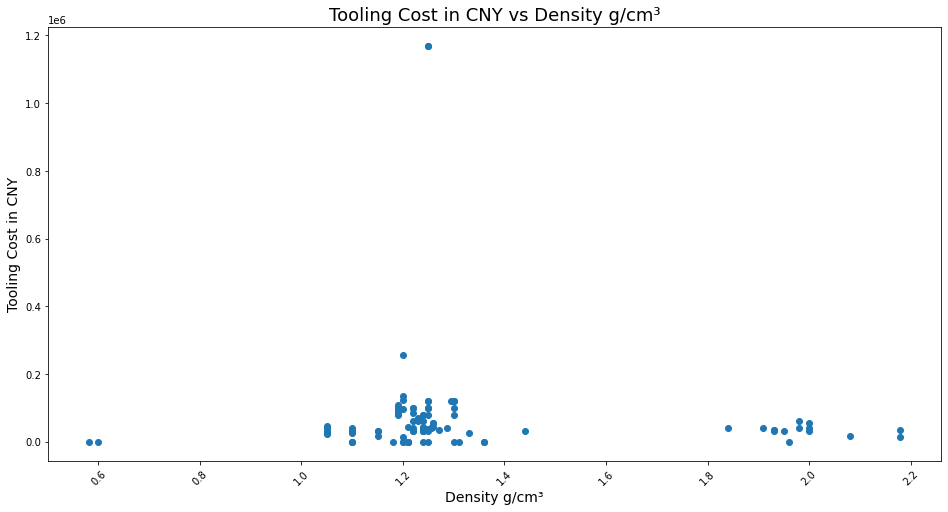



 Surface Area mm²  



,Surface Area mm²
8453.38,0.04
28196.05,0.02
110534.87,0.02
108935.74,0.02
36916.44,0.02
...,...
141083.88,0.01
1930.62,0.01
2586.03,0.01
1210.11,0.01


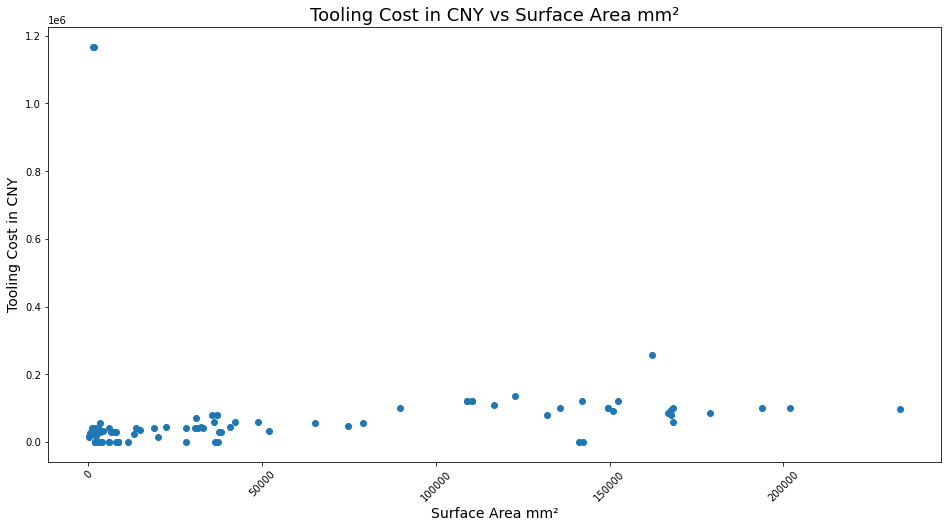



 Minimum Box Dimensions L mm  



,Minimum Box Dimensions L mm
56.44,0.04
196.23,0.02
74.88,0.02
178.57,0.02
218.48,0.02
...,...
284.38,0.01
79.86,0.01
49.34,0.01
268.94,0.01


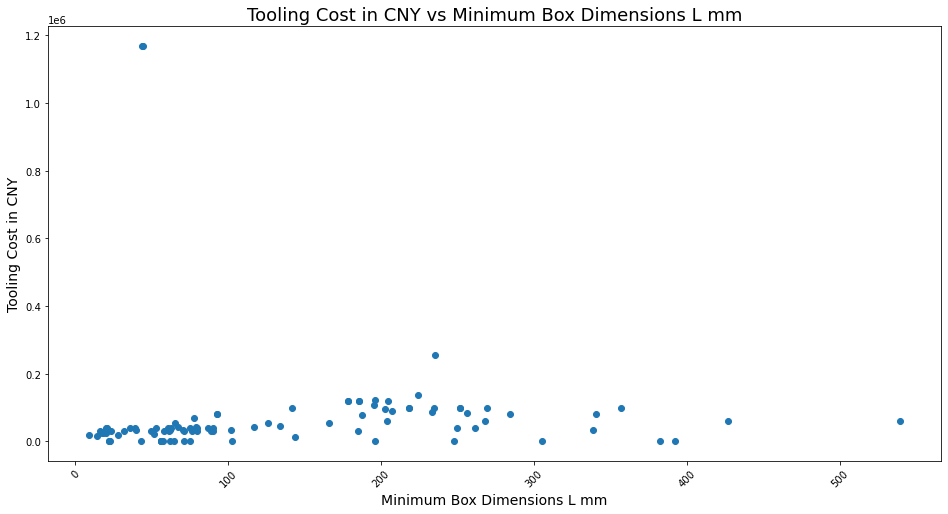



 Minimum Box Dimensions W mm  



,Minimum Box Dimensions W mm
56.44,0.04
19.98,0.03
125.76,0.02
79.02,0.02
22.37,0.02
...,...
39.75,0.01
49.34,0.01
38.92,0.01
62.13,0.01


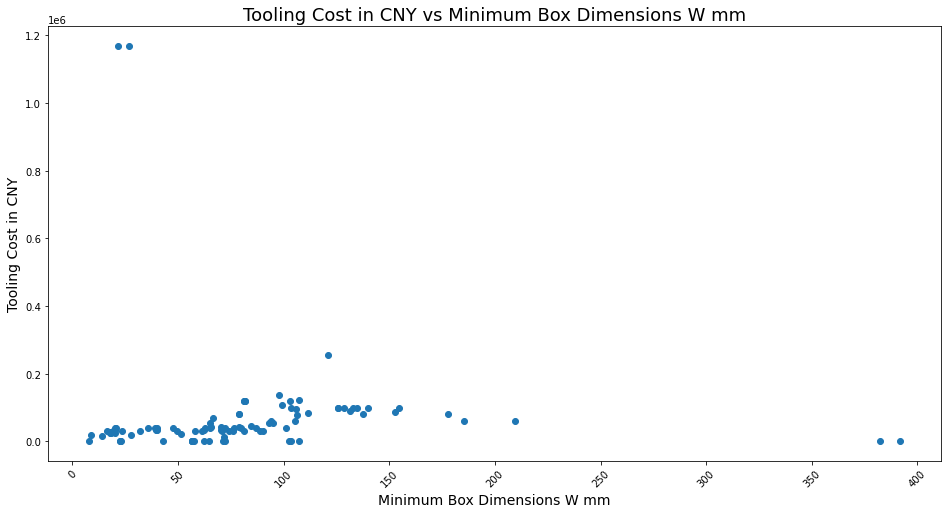



 Minimum Box Dimensions H mm  



,Minimum Box Dimensions H mm
6.45,0.06
8.40,0.04
9.00,0.02
10.00,0.02
92.43,0.02
...,...
84.70,0.01
40.00,0.01
5.47,0.01
5.27,0.01


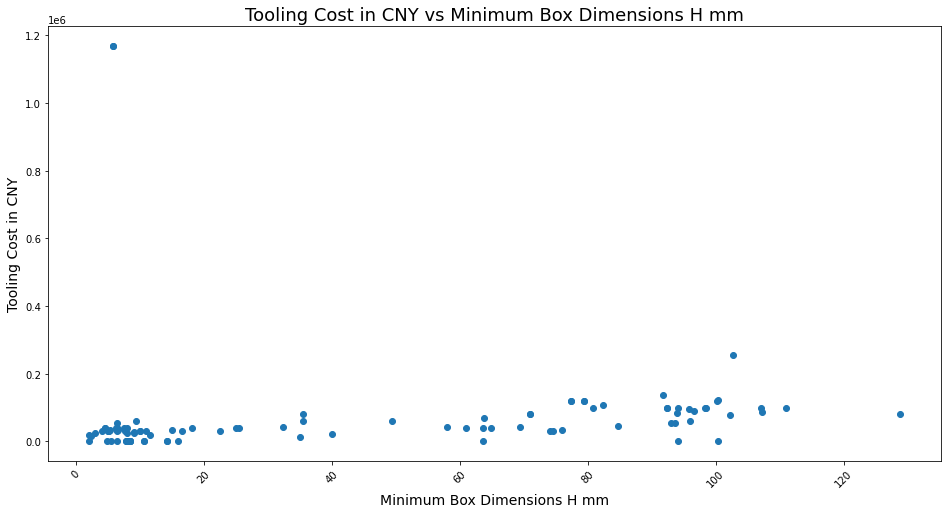



 Material Price /kg  



,Material Price /kg
0.00,0.15
18.00,0.09
60.00,0.08
21.00,0.08
18.50,0.07
140.00,0.05
19.00,0.05
120.00,0.04
23.00,0.04
20.00,0.04


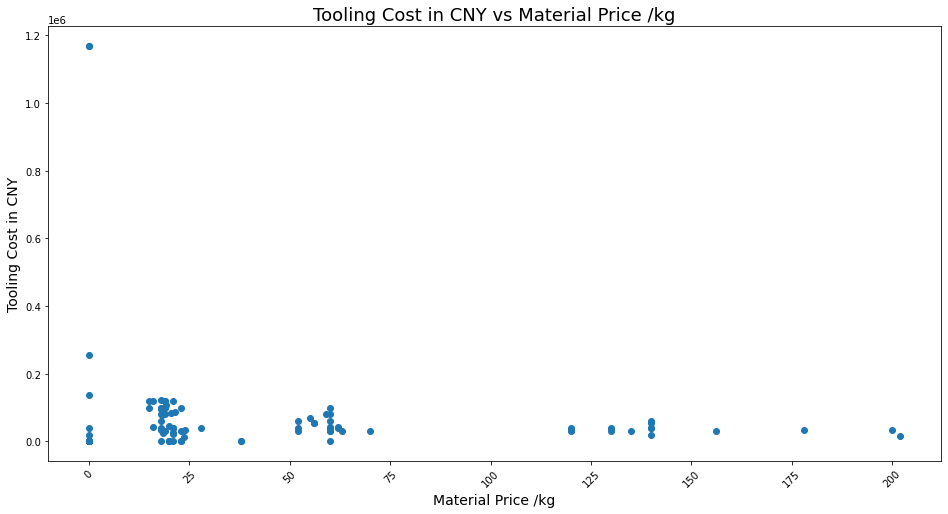

In [318]:
#Tooling cost vs numerical data
for i in range(0, 9):
    print(Back.YELLOW, df_cable.columns[i], Style.RESET_ALL, '\n')
    display(pd.DataFrame(df_cable.iloc[:,i].value_counts(dropna = False, normalize = True, ascending = False)))
    plt.figure(figsize = (16,8))
    plt.scatter(df_cable.iloc[:, i], df_cable.iloc[:,-2])
    plt.title(df_cable.columns[-2] + ' vs ' + df_cable.columns[i], fontsize = 18)
    plt.xlabel(df_cable.columns[i], fontsize = 14)
    plt.ylabel(df_cable.columns[-2], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.show()
    print('\n')

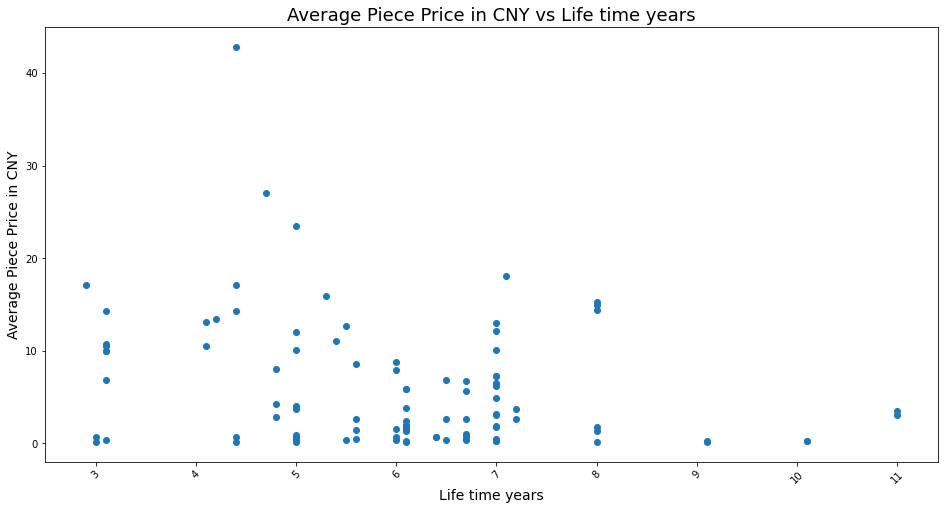

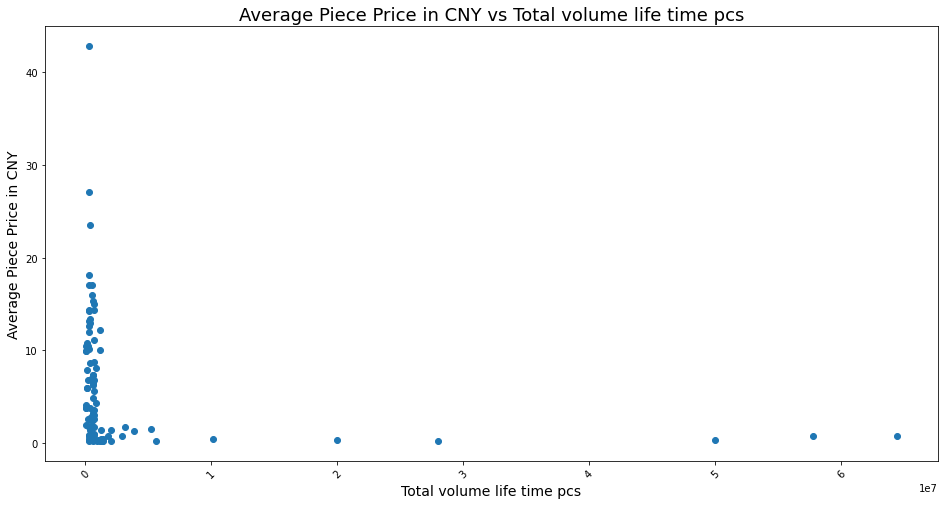

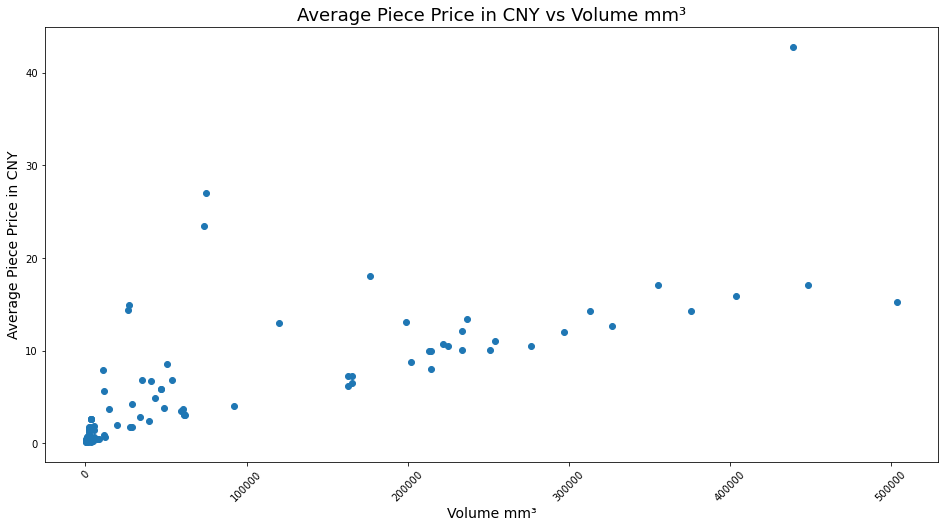

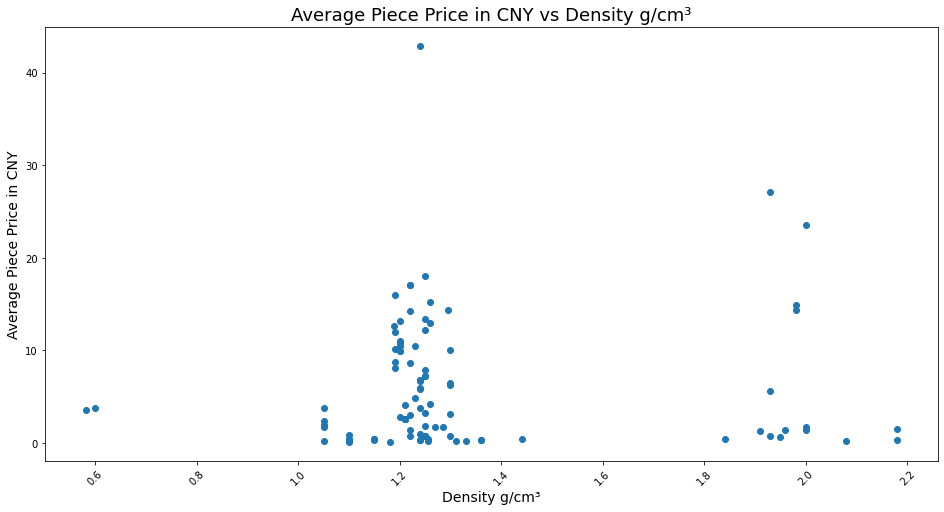

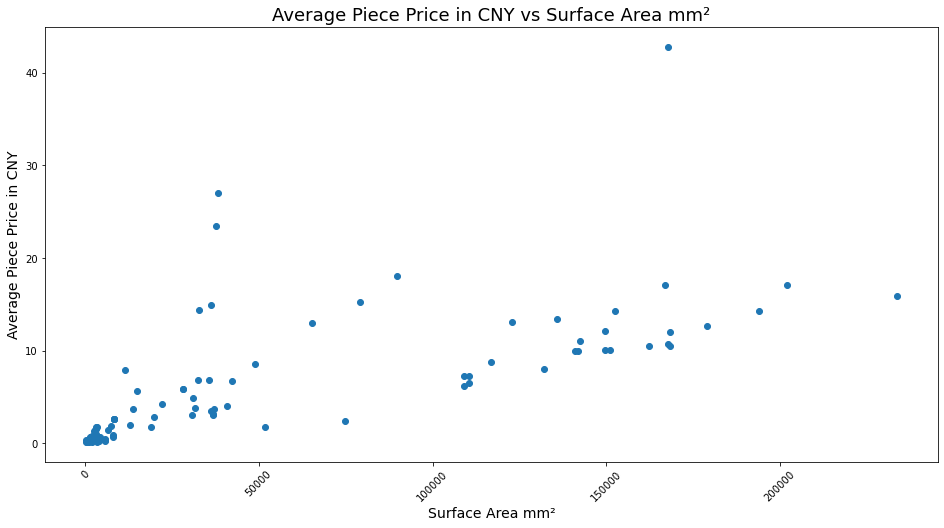

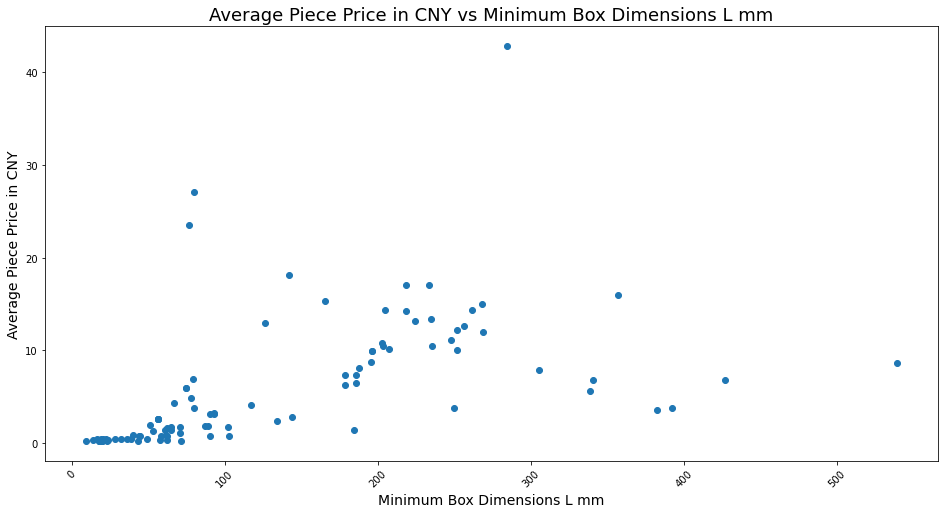

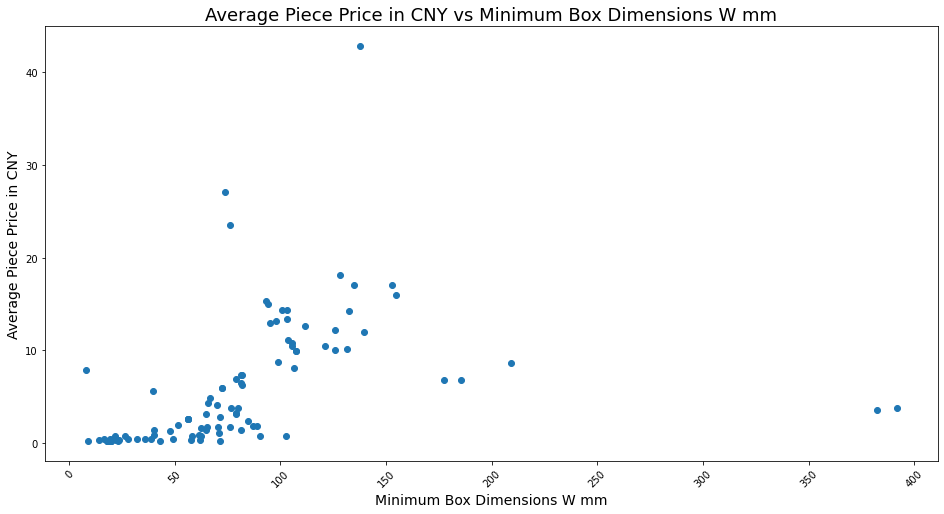

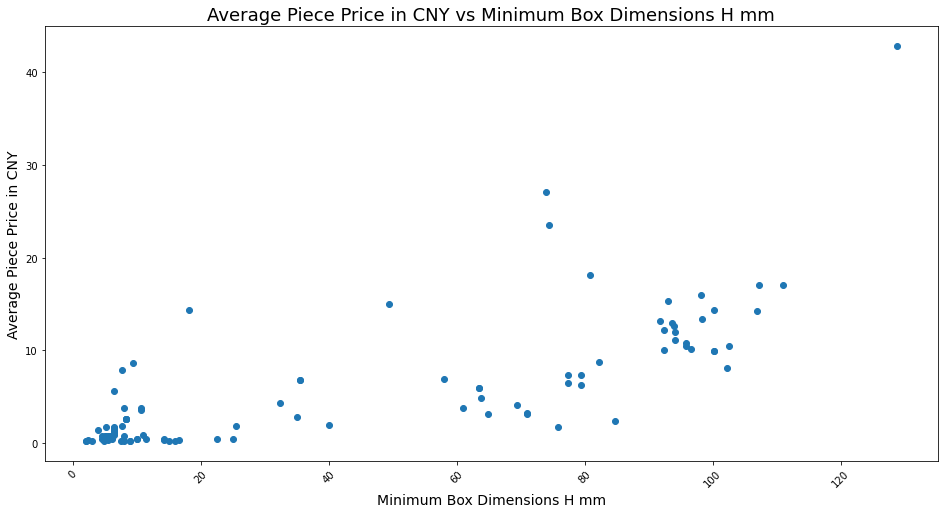

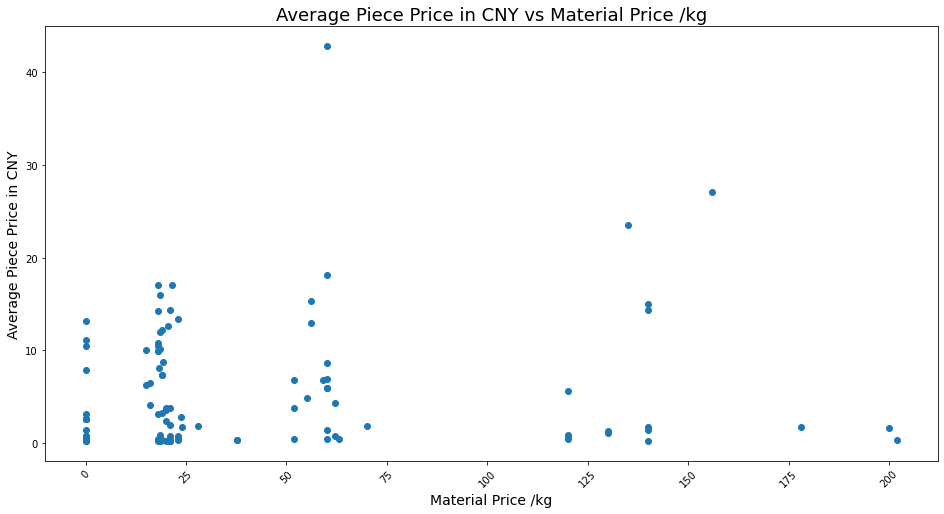

In [319]:
#Average price vs numerical data
for i in range(0, 9):
    plt.figure(figsize = (16,8))
    plt.scatter(df_cable.iloc[:, i], df_cable.iloc[:,-1])
    plt.title(df_cable.columns[-1] + ' vs ' + df_cable.columns[i], fontsize = 18)
    plt.xlabel(df_cable.columns[i], fontsize = 14)
    plt.ylabel(df_cable.columns[-1], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.show()
    print('\n')

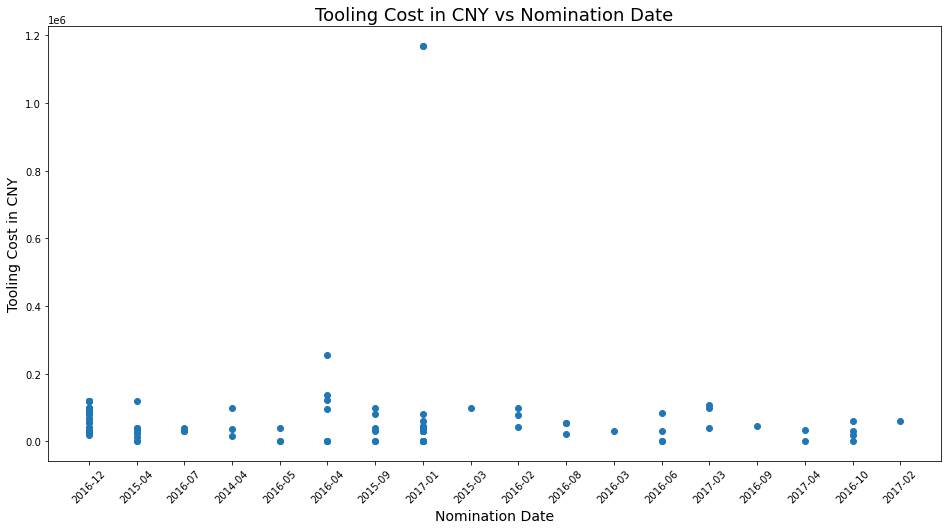

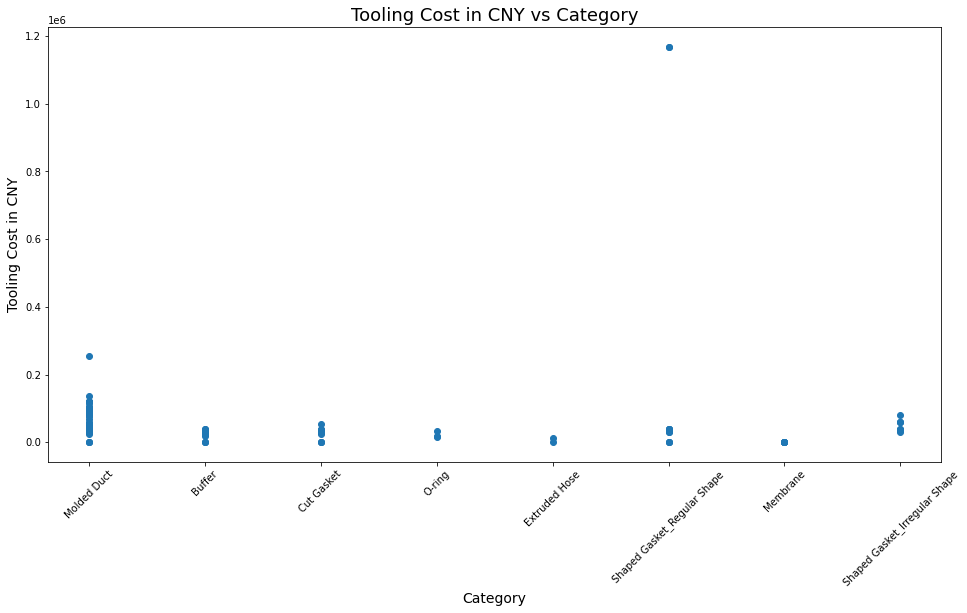

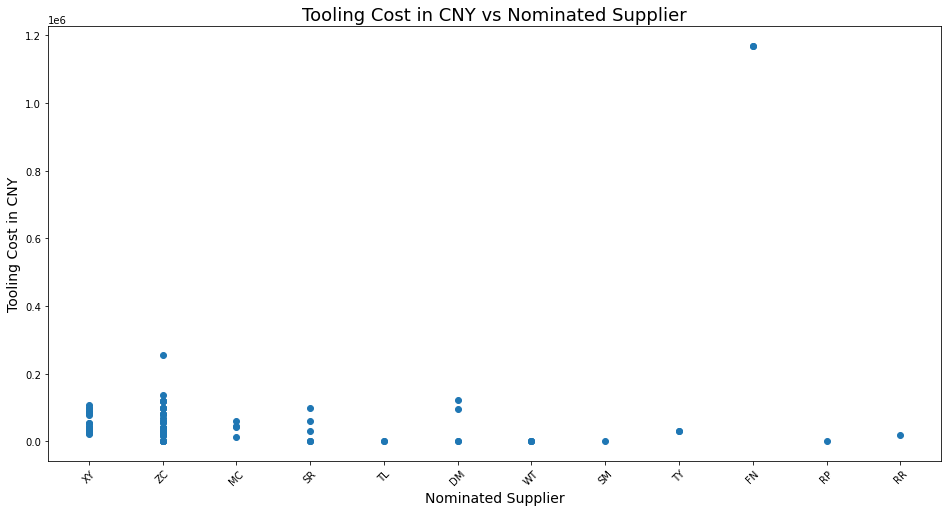

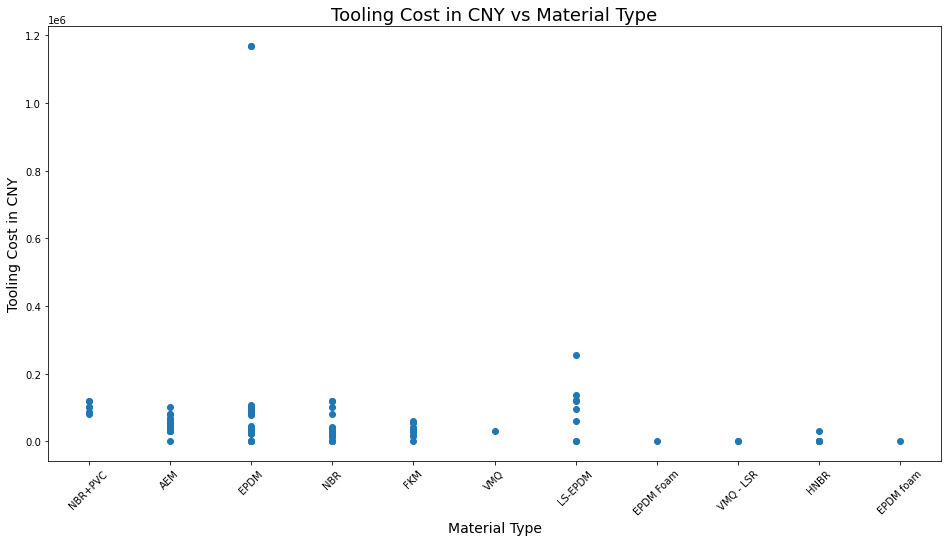

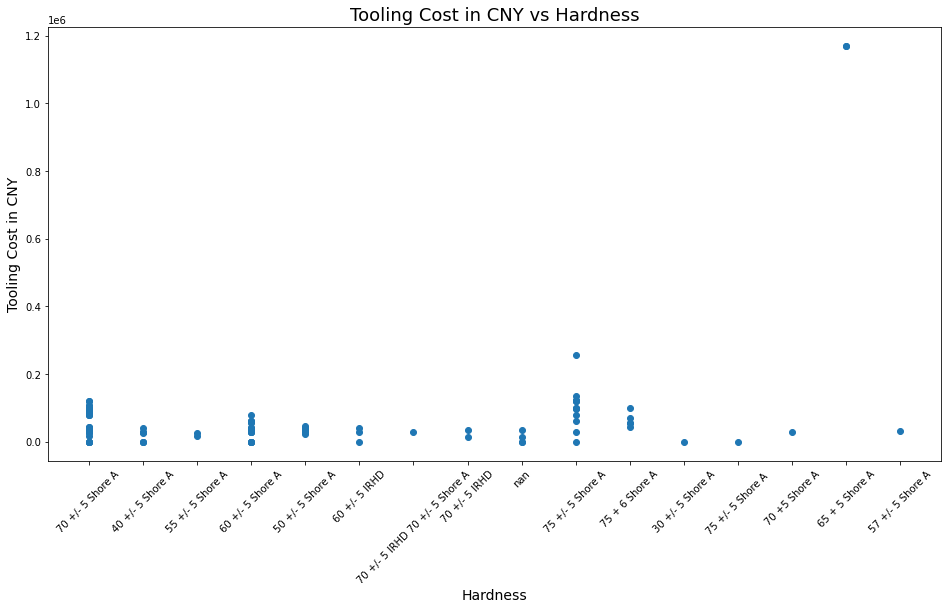

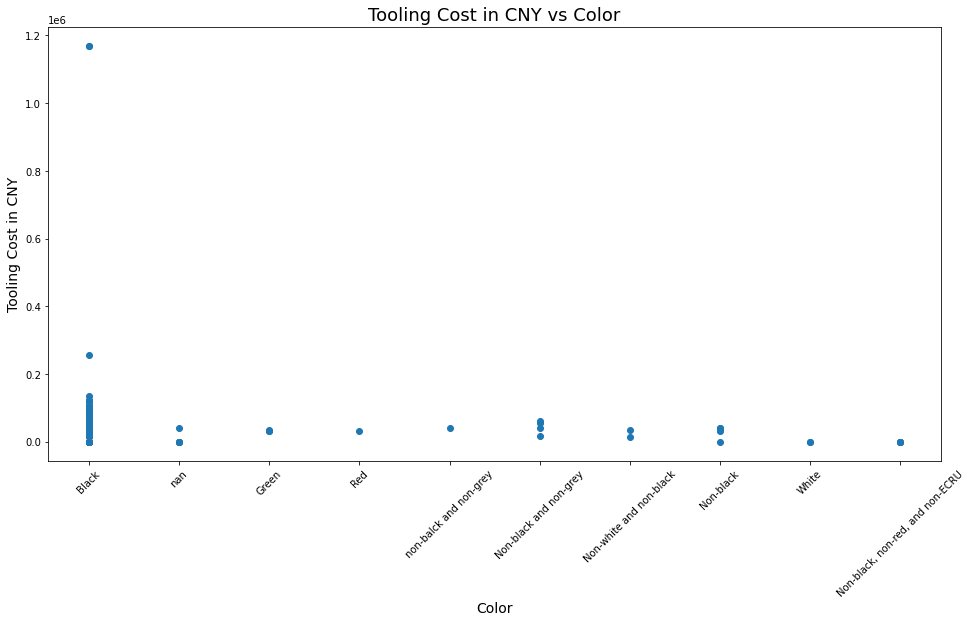

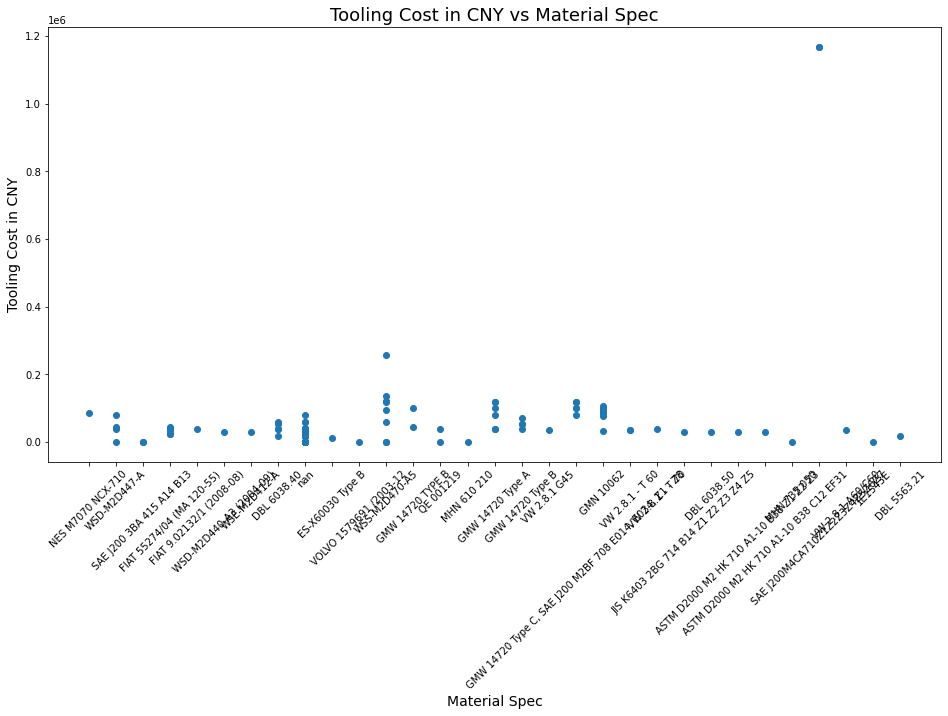

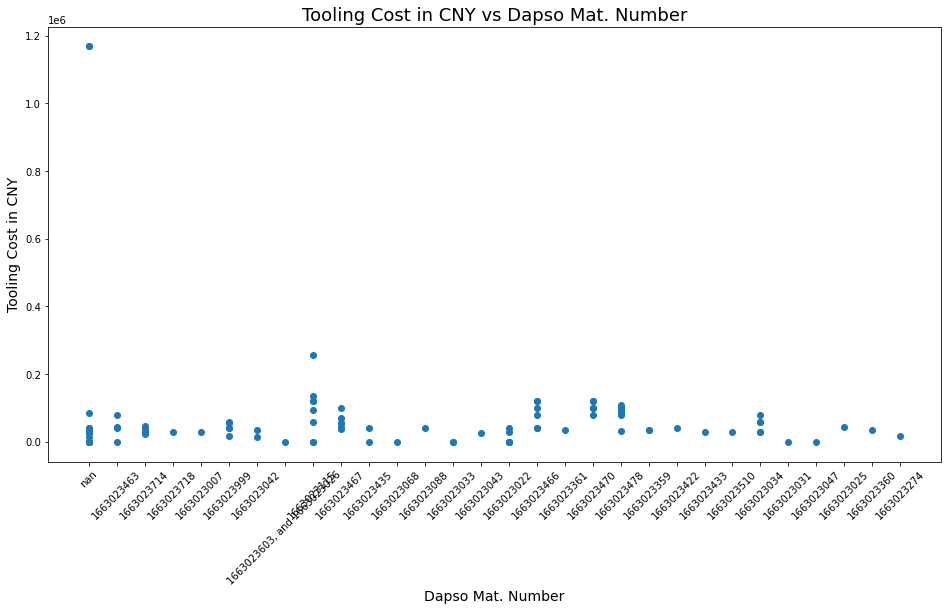

In [320]:
#Tooling cost vs categorical data
for i in range(9, len(df_cable.columns)-2):
    plt.figure(figsize = (16,8))
    plt.scatter(df_cable.iloc[:, i], df_cable.iloc[:,-2])
    plt.title(df_cable.columns[-2] + ' vs ' + df_cable.columns[i], fontsize = 18)
    plt.xlabel(df_cable.columns[i], fontsize = 14)
    plt.ylabel(df_cable.columns[-2], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.show()
    print('\n')

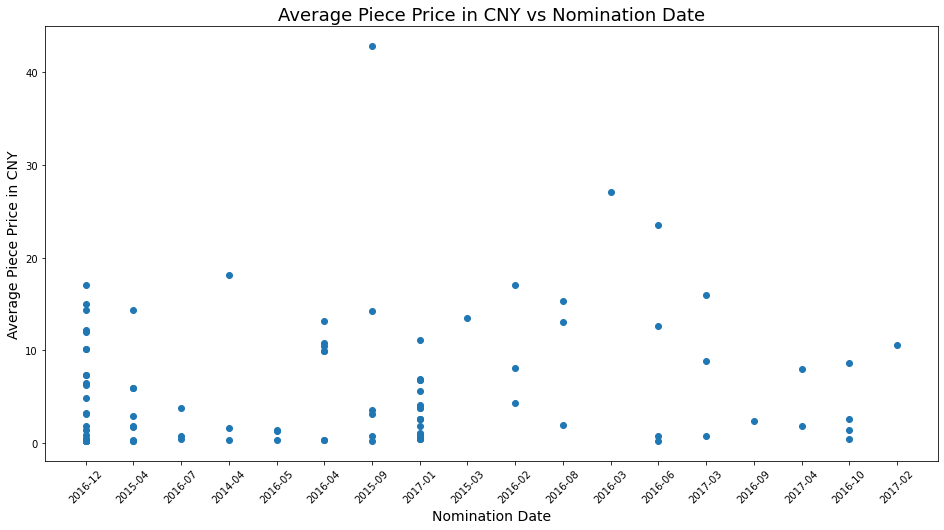

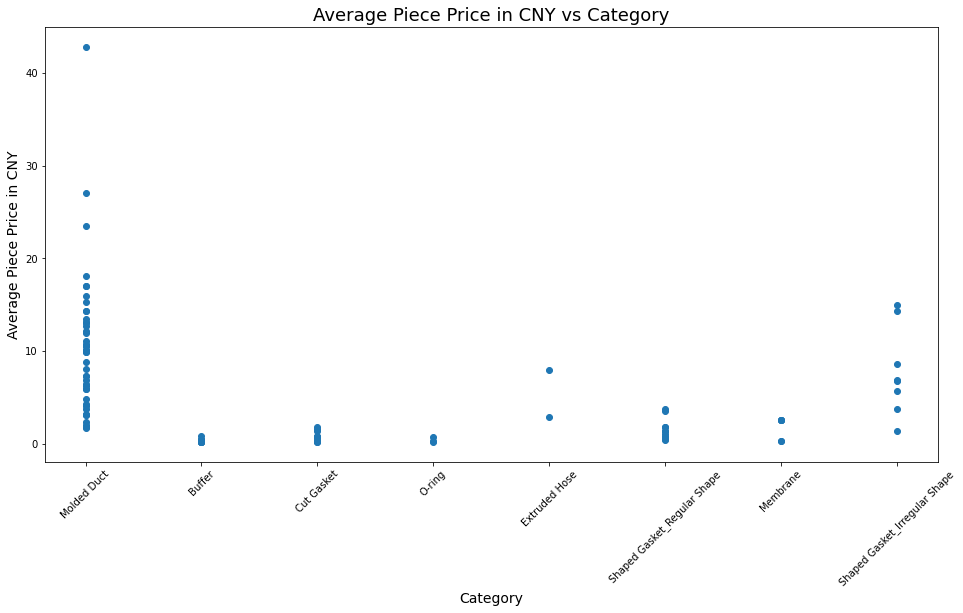

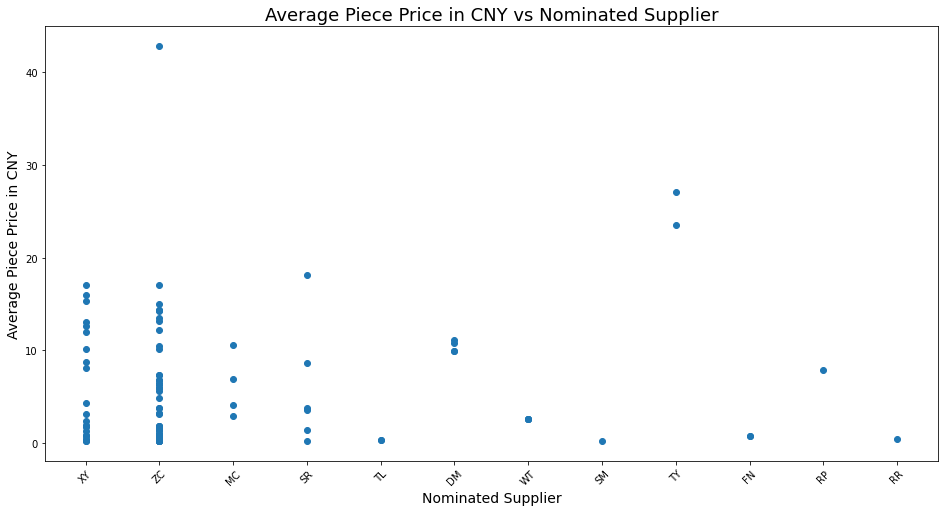

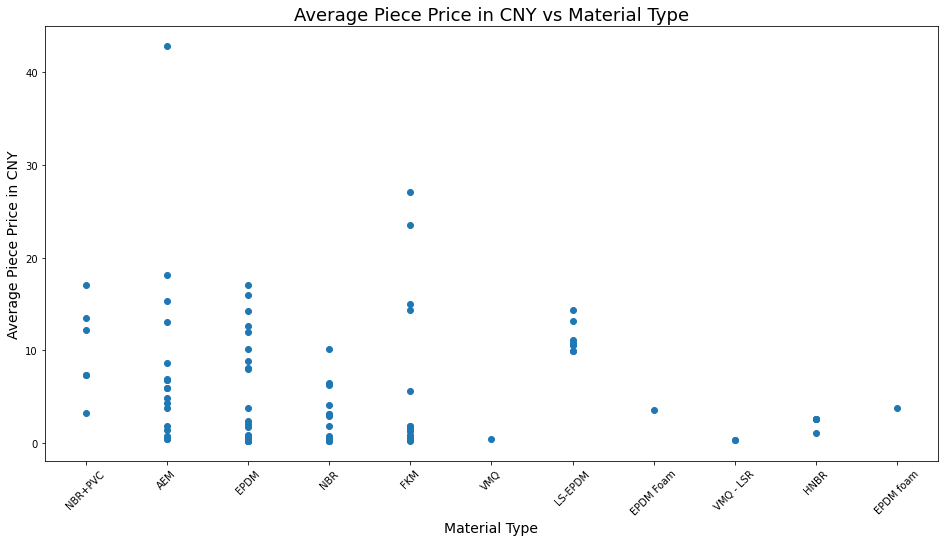

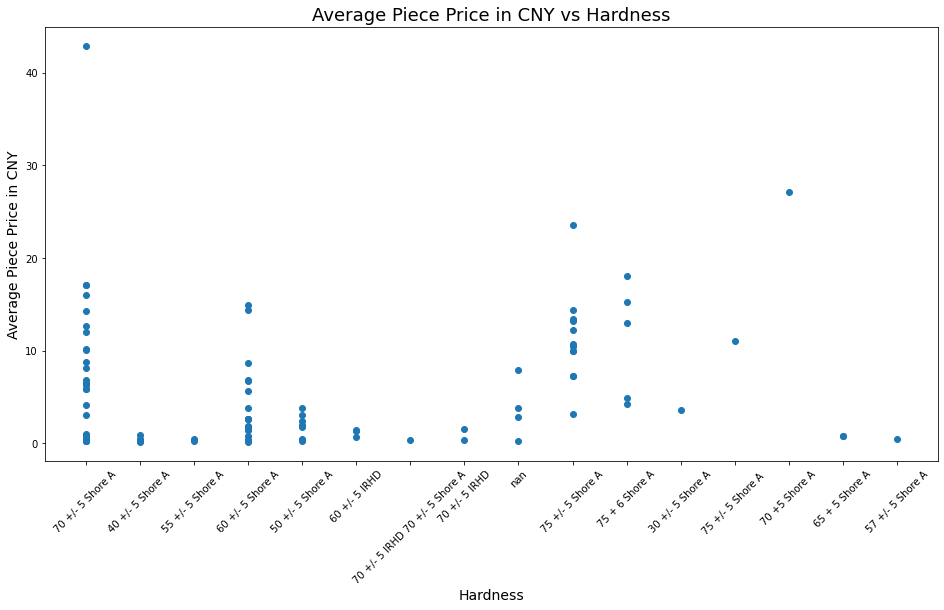

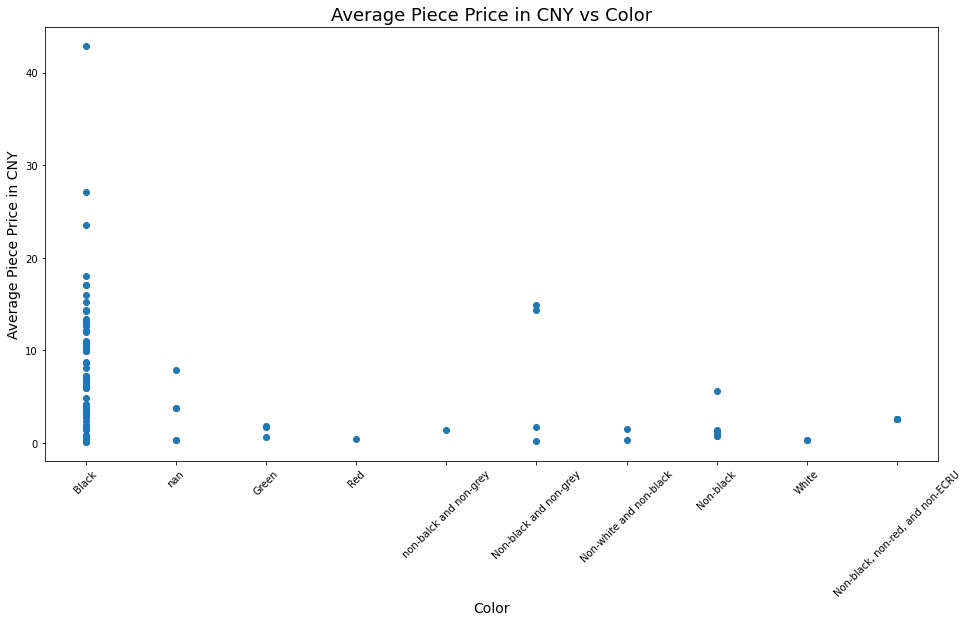

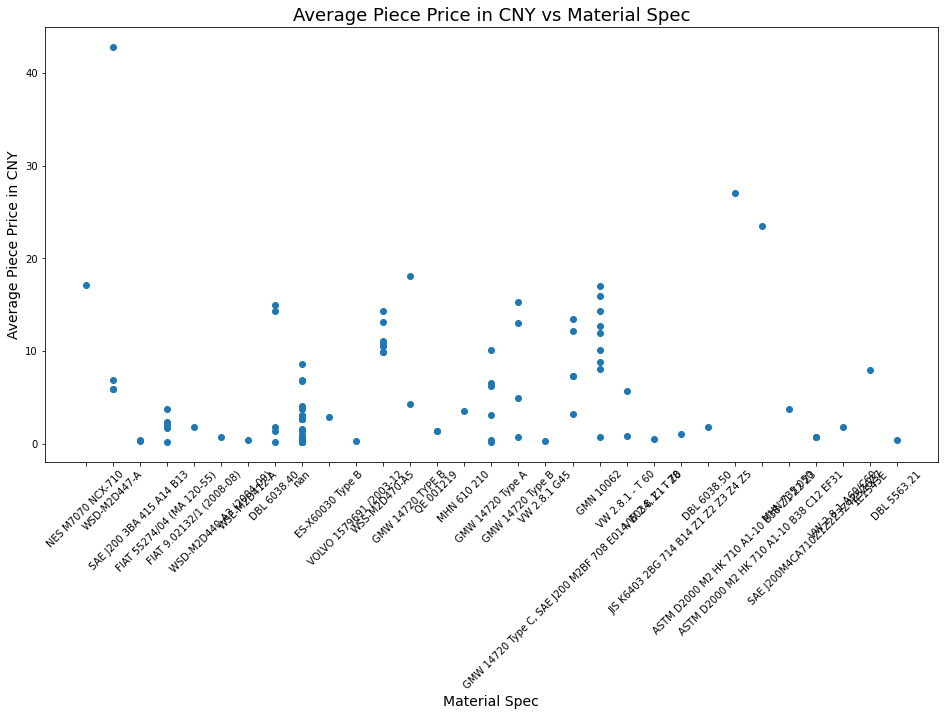

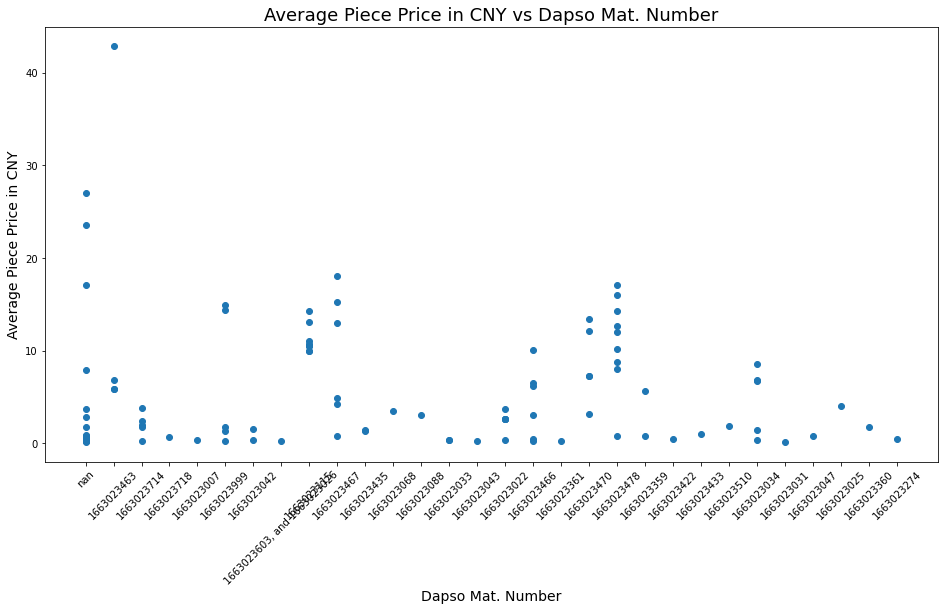

In [321]:
#Average price vs categorical data
for i in range(9, len(df_cable.columns)-2):
    plt.figure(figsize = (16,8))
    plt.scatter(df_cable.iloc[:, i], df_cable.iloc[:,-1])
    plt.title(df_cable.columns[-1] + ' vs ' + df_cable.columns[i], fontsize = 18)
    plt.xlabel(df_cable.columns[i], fontsize = 14)
    plt.ylabel(df_cable.columns[-1], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.show()
    print('\n')

<font size="5">**Correlation**</font>

,Life time years,Total volume life time pcs,Volume mm³,Density g/cm³,Surface Area mm²,Minimum Box Dimensions L mm,Minimum Box Dimensions W mm,Minimum Box Dimensions H mm,Material Price /kg,Tooling Cost in CNY,Average Piece Price in CNY
Life time years,1.000000,0.263026,-0.310823,0.151124,-0.359466,-0.083187,-0.022103,-0.322626,0.171242,-0.017736,-0.262459
Total volume life time pcs,0.263026,1.000000,-0.174229,0.011818,-0.191703,-0.187827,-0.167354,-0.231893,-0.110827,0.750796,-0.191976
Volume mm³,-0.310823,-0.174229,1.000000,-0.192138,0.929383,0.531087,0.419402,0.862071,-0.245801,0.070400,0.749987
Density g/cm³,0.151124,0.011818,-0.192138,1.000000,-0.213350,-0.191143,-0.353989,-0.204436,0.774808,-0.047348,0.062096
Surface Area mm²,-0.359466,-0.191703,0.929383,-0.213350,1.000000,0.602587,0.459923,0.896780,-0.292127,0.076421,0.698891
Minimum Box Dimensions L mm,-0.083187,-0.187827,0.531087,-0.191143,0.602587,1.000000,0.770989,0.449724,-0.109934,-0.002098,0.536905
Minimum Box Dimensions W mm,-0.022103,-0.167354,0.419402,-0.353989,0.459923,0.770989,1.000000,0.353450,-0.122483,-0.064953,0.389509
Minimum Box Dimensions H mm,-0.322626,-0.231893,0.862071,-0.204436,0.896780,0.449724,0.353450,1.000000,-0.263887,0.046730,0.743734
Material Price /kg,0.171242,-0.110827,-0.245801,0.774808,-0.292127,-0.109934,-0.122483,-0.263887,1.000000,-0.161925,0.061571
Tooling Cost in CNY,-0.017736,0.750796,0.070400,-0.047348,0.076421,-0.002098,-0.064953,0.046730,-0.161925,1.000000,0.020708


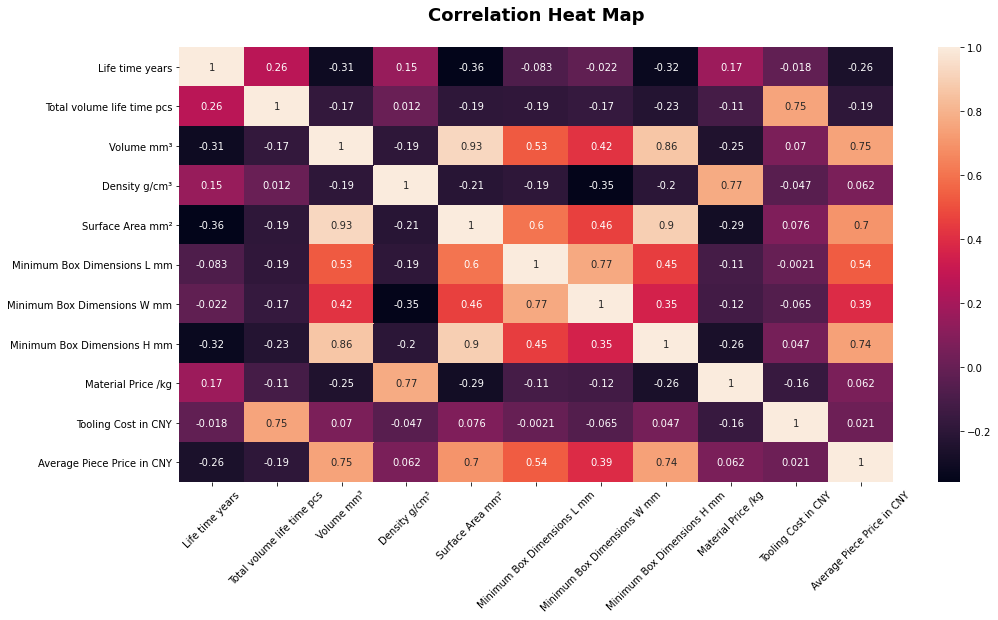

In [322]:
#numerical only
corrMatrix = df_cable.corr()
display(corrMatrix)
plt.figure(figsize = (16,8))
sn.heatmap(corrMatrix, annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Heat Map\n', fontsize=18, fontweight='bold')
plt.savefig('Correlation Heat Map' +'.jpeg')
plt.show()

<font size="5">**OLS Regression**</font>

In [323]:
# numeric, overall price

X = df_cable.iloc[:, :9]
Y = df_cable.iloc[:, -1]
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                OLS Regression Results                                
Dep. Variable:     Average Piece Price in CNY   R-squared:                       0.743
Model:                                    OLS   Adj. R-squared:                  0.718
Method:                         Least Squares   F-statistic:                     28.94
Date:                        Tue, 20 Apr 2021   Prob (F-statistic):           6.11e-23
Time:                                14:55:24   Log-Likelihood:                -267.27
No. Observations:                         100   AIC:                             554.5
Df Residuals:                              90   BIC:                             580.6
Df Model:                                   9                                         
Covariance Type:                    nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

<font size="5">**One-hot Encoding**</font>

In [324]:
onehot_Nomination_Date = pd.get_dummies(df_cable['Nomination Date'], prefix=None)
onehot_Category = pd.get_dummies(df_cable.Category, prefix=None)
onehot_Nominated_Supplier = pd.get_dummies(df_cable['Nominated Supplier'], prefix=None)
onehot_Material_Type = pd.get_dummies(df_cable['Material Type'], prefix=None)
onehot_Hardness = pd.get_dummies(df_cable['Hardness'], prefix=None)
onehot_Color = pd.get_dummies(df_cable['Color'], prefix=None)
onehot_Material_Spec = pd.get_dummies(df_cable['Material Spec'], prefix=None)
onehot_Dapso_Mat_Number = pd.get_dummies(df_cable['Dapso Mat. Number'], prefix=None)

list_cat = [onehot_Nomination_Date,onehot_Category,onehot_Nominated_Supplier,onehot_Material_Type,onehot_Hardness,onehot_Color,onehot_Material_Spec,onehot_Dapso_Mat_Number]
df_cat = df_cable.iloc[:, :9].join(list_cat[0]).join(list_cat[1]).join(list_cat[2]).join(list_cat[3]).join(list_cat[4]).join(list_cat[5], rsuffix='_2').join(list_cat[6], rsuffix='_3').join(list_cat[7], rsuffix='_4').join(df_cable.iloc[:, -2:])

In [357]:
df_cable.iloc[:,9:]

,Nomination Date,Category,Nominated Supplier,Material Type,Hardness,Color,Material Spec,Dapso Mat. Number,Tooling Cost in CNY,Average Piece Price in CNY
No,,,,,,,,,,
0,2016-12,Molded Duct,XY,NBR+PVC,70 +/- 5 Shore A,Black,NES M7070 NCX-710,nan,85800,17.071102
1,2015-04,Molded Duct,ZC,AEM,70 +/- 5 Shore A,Black,WSD-M2D447-A,1663023463,40000,5.894206
2,2015-04,Buffer,ZC,EPDM,40 +/- 5 Shore A,nan,SAE J200 3BA 415 A14 B13,nan,0,0.310500
3,2015-04,Buffer,ZC,EPDM,55 +/- 5 Shore A,Black,FIAT 55274/04 (MA 120-55),1663023714,25000,0.197601
4,2015-04,Molded Duct,ZC,NBR,60 +/- 5 Shore A,Black,FIAT 9.02132/1 (2008-08),nan,40000,1.787965
...,...,...,...,...,...,...,...,...,...,...
95,2016-10,Buffer,RR,NBR,55 +/- 5 Shore A,Black,DBL 5563.21,1663023274,18000,0.419931
96,2016-10,Shaped Gasket_Irregular Shape,SR,AEM,60 +/- 5 Shore A,Black,nan,1663023034,30000,1.403625
97,2016-10,Membrane,WT,HNBR,60 +/- 5 Shore A,"Non-black, non-red, and non-ECRU",nan,1663023022,0,2.604319


In [325]:
# categorical, overall Price adjusted variables

X = df_cat.iloc[:, :-1]
Y = df_cat.iloc[:, -1]
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                OLS Regression Results                                
Dep. Variable:     Average Piece Price in CNY   R-squared:                       0.991
Model:                                    OLS   Adj. R-squared:                  0.941
Method:                         Least Squares   F-statistic:                     20.14
Date:                        Tue, 20 Apr 2021   Prob (F-statistic):           1.91e-08
Time:                                14:55:25   Log-Likelihood:                -102.31
No. Observations:                         100   AIC:                             372.6
Df Residuals:                              16   BIC:                             591.5
Df Model:                                  83                                         
Covariance Type:                    nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
------

<font size="5">**Linear Regression Model**</font>

In [341]:
lin_reg_mod = linear_model.LinearRegression()
rfg_reg_mod = RandomForestRegressor(random_state=1)
gbr_reg_mod = GradientBoostingRegressor(random_state=1)

Intercept: 
 -5.1483215193464495
Coefficients: 
 [-9.66438842e-02  3.61341616e-08  3.11273617e-05  2.78905505e+00
 -5.95949119e-05  2.15384999e-02 -1.06031485e-02  1.31031222e-01
  2.11363077e-02  9.56086647e-01 -1.13619697e+00 -1.06723676e+00
  5.52231280e+00 -1.88011171e+00  1.32907599e+01 -1.11070764e+00
 -6.96107082e-01  2.41953749e+00 -1.91584794e+00 -3.41802444e+00
 -1.77635684e-15  1.01972136e+00 -1.05539170e+00 -5.92280793e-01
 -6.73601664e-01]


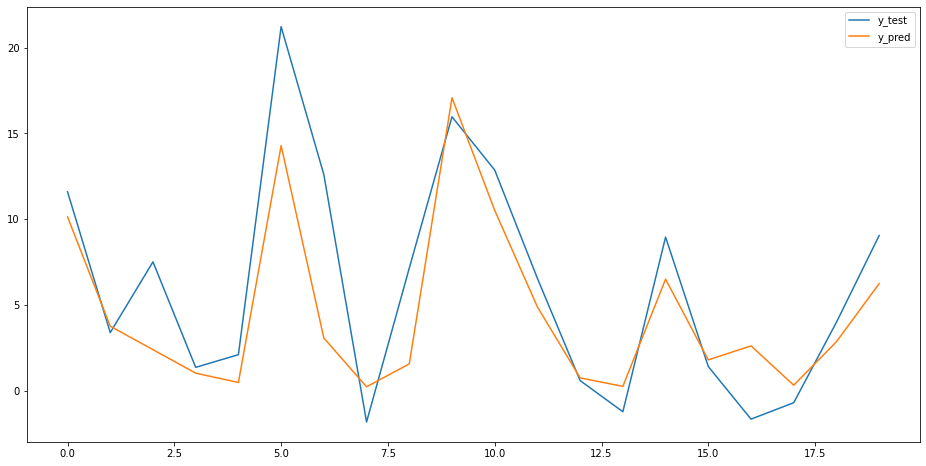

,0,1
0,11.588536,10.126733
1,3.378360,3.749208
2,7.502768,2.383812
3,1.351566,1.013520
4,2.091320,0.469263
5,21.213606,14.279499
6,12.591473,3.063685
7,-1.835995,0.217711
8,7.139784,1.553486
9,15.960927,17.071102


Intercept: 
 -7.383233606150663
Coefficients: 
 [-6.59287076e-01  4.35546657e-08  3.00357589e-05  4.74052673e+00
 -6.42055991e-05  9.95216384e-03  2.06816875e-02  1.88897527e-01
  3.98028526e-02  1.74800102e+00 -9.47384130e-01  9.06706843e+00
  4.20330525e+00 -3.73199764e+00 -3.42940566e+00]


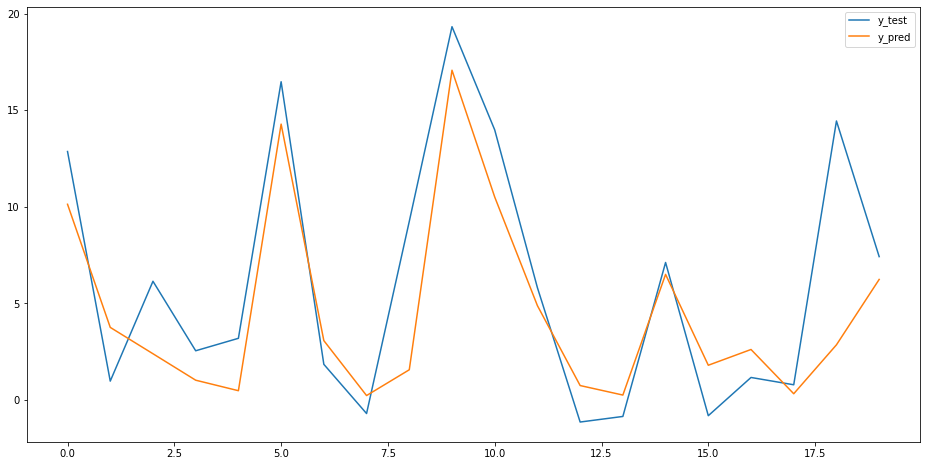

,0,1
0,12.859870,10.126733
1,0.965735,3.749208
2,6.138044,2.383812
3,2.537958,1.013520
4,3.183325,0.469263
5,16.474750,14.279499
6,1.835504,3.063685
7,-0.712951,0.217711
8,9.238241,1.553486
9,19.326896,17.071102


Intercept: 
 -2.4066916824022453
Coefficients: 
 [-3.77934948e-01  6.73362793e-08  3.08551225e-05  9.60021666e-01
 -3.99547808e-05  1.98850411e-02 -7.44285124e-03  1.07073648e-01
  3.24165462e-02 -2.28803533e+00 -1.29022634e+00 -1.83189416e+00
  4.66411070e+00  2.26531033e+00  1.11767429e+00  1.89937646e+00
  3.07154921e-01  1.31901421e+01  4.90605772e+00]


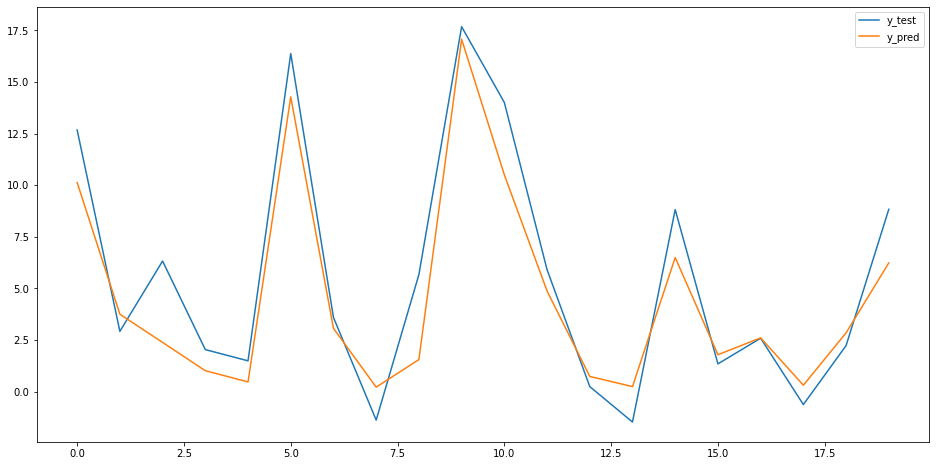

,0,1
0,12.674101,10.126733
1,2.919933,3.749208
2,6.325054,2.383812
3,2.035639,1.013520
4,1.491772,0.469263
5,16.375582,14.279499
6,3.594257,3.063685
7,-1.378854,0.217711
8,5.669324,1.553486
9,17.677697,17.071102


Intercept: 
 2.329874442551185
Coefficients: 
 [-8.43064671e-01  7.79897867e-08  2.40889305e-05  1.18302990e+00
 -4.07060931e-05  2.43295466e-02 -2.35108320e-02  1.48779541e-01
  1.67462454e-02 -2.56433226e-01 -3.06792602e+00  7.56117156e+00
  2.73709427e+00  1.52497753e+00  3.25334143e+00 -6.33218550e+00
 -2.04986562e+00 -4.65162008e+00]


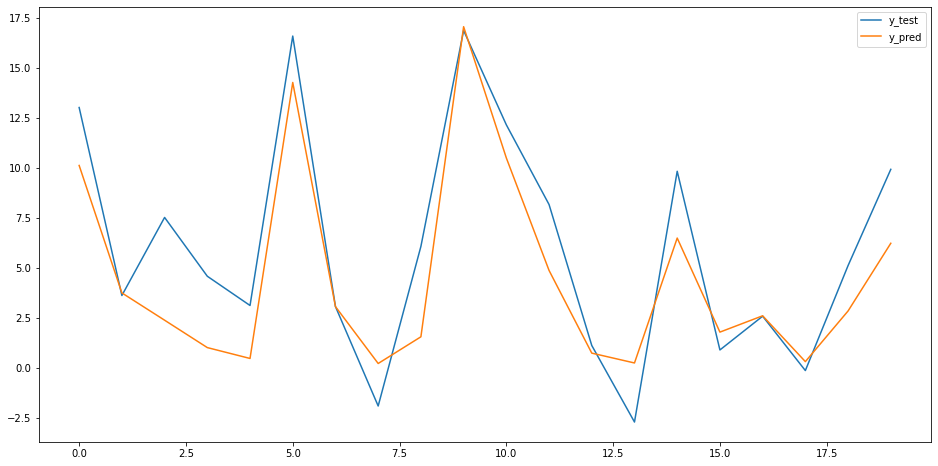

,0,1
0,13.026575,10.126733
1,3.620238,3.749208
2,7.525762,2.383812
3,4.583668,1.013520
4,3.120099,0.469263
5,16.601961,14.279499
6,3.066458,3.063685
7,-1.909461,0.217711
8,6.076222,1.553486
9,16.881496,17.071102


Intercept: 
 -5.954310318180292
Coefficients: 
 [-5.26052785e-01  7.24832172e-08  3.19410407e-05  5.74722281e+00
 -5.33070615e-05  1.70915355e-02  3.32754432e-03  1.17718884e-01
  1.82651316e-02  2.50682613e+00  1.97076410e-01 -1.81668759e+00
  1.17038403e+00 -1.34523148e+00 -4.54413861e+00 -5.84073665e-01
 -3.26358112e+00 -7.44492672e+00 -2.02582356e+00 -1.51575592e+00
  1.08510305e+01 -6.72484438e-01 -1.97531437e+00]


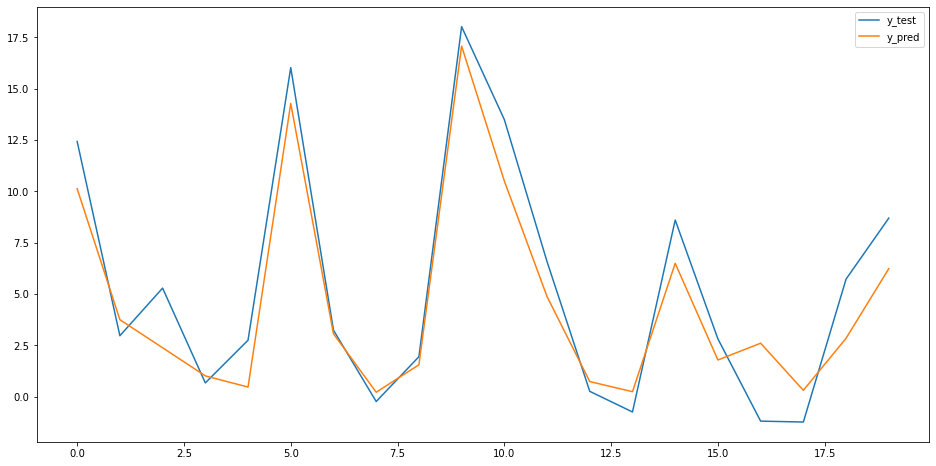

,0,1
0,12.426767,10.126733
1,2.968932,3.749208
2,5.286968,2.383812
3,0.671805,1.013520
4,2.750585,0.469263
5,16.025217,14.279499
6,3.240400,3.063685
7,-0.234325,0.217711
8,1.946989,1.553486
9,18.015902,17.071102


Intercept: 
 -5.706238602885241
Coefficients: 
 [-5.90935025e-01  5.42868350e-08  3.29400241e-05  4.23921503e+00
 -5.62959251e-05  1.87799782e-02  3.18087068e-03  1.09058307e-01
  5.42607405e-02  1.65086404e-01 -4.29767749e+00 -3.75067253e+00
 -2.48265887e+00  5.20530626e+00 -1.12638909e+01 -2.06294520e+00
  4.33615156e-01]


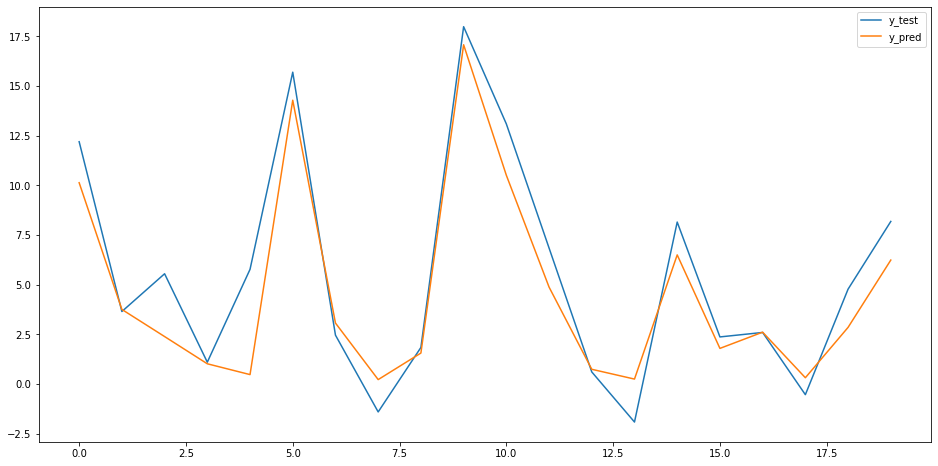

,0,1
0,12.190697,10.126733
1,3.643830,3.749208
2,5.544586,2.383812
3,1.093735,1.013520
4,5.766623,0.469263
5,15.690634,14.279499
6,2.454421,3.063685
7,-1.409738,0.217711
8,1.836135,1.553486
9,17.980526,17.071102


Intercept: 
 -2.455103934265848
Coefficients: 
 [ 5.49941651e-02  1.08565260e-09  3.47247799e-05  9.68810313e-01
 -5.66424736e-06  2.14214128e-02 -6.30219657e-03  2.43114450e-02
 -4.54102397e-03  1.84170824e+00  1.90734087e+01  2.26748544e+01
  6.89687361e-01  4.05351621e+00  1.32802104e+00  6.23040453e-09
  2.74677287e-01 -4.47243131e-09 -2.83221424e+00  6.10775863e+00
 -9.25746257e-01  2.61282743e-01 -1.18972155e+00 -4.55862015e-10
 -2.98110570e+00 -2.64491106e+00  1.00701669e-10  7.75494079e-01
  7.98849060e-01  5.76087170e-01 -4.31529813e-01 -1.57017161e-01
  0.00000000e+00  2.14528055e+00  0.00000000e+00  4.85394326e-01
  7.81305163e+00  5.59094512e-01]


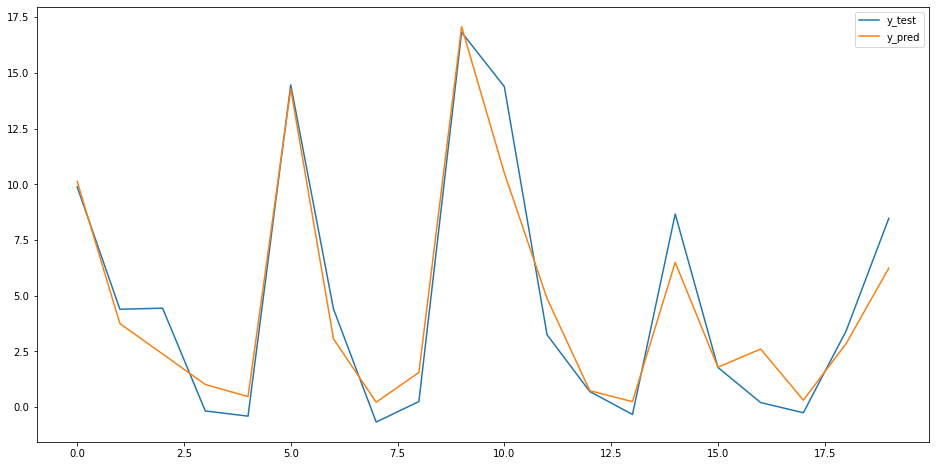

,0,1
0,9.883599,10.126733
1,4.391016,3.749208
2,4.438349,2.383812
3,-0.173811,1.013520
4,-0.406730,0.469263
5,14.461217,14.279499
6,4.405979,3.063685
7,-0.671011,0.217711
8,0.247885,1.553486
9,16.821150,17.071102


Intercept: 
 -4.337088520845558
Coefficients: 
 [-1.72060878e+00  3.36865753e-08  2.69255028e-05  9.95156002e+00
 -2.18423191e-05  2.31347228e-02 -2.48414645e-03  1.19984401e-01
  1.07362845e-02 -3.30673577e+00  3.32584291e+00 -7.65864670e+00
 -3.44888084e+00  4.89762053e+00 -2.09727877e+00 -9.50540939e+00
  5.97828368e+00 -6.18209763e+00  1.08048443e+01 -2.03825756e-09
 -9.72875942e+00  9.73495159e-01 -6.47764445e+00  1.40348609e+00
 -4.29878355e-12 -9.00790553e-12  3.75627307e-12 -5.83917981e+00
  4.85208745e-01 -2.23709977e+00 -2.74751043e-01 -5.02313762e+00
 -7.40408344e+00  2.26146580e+00  4.16529289e+00 -9.49926940e-01
 -8.91230916e+00]


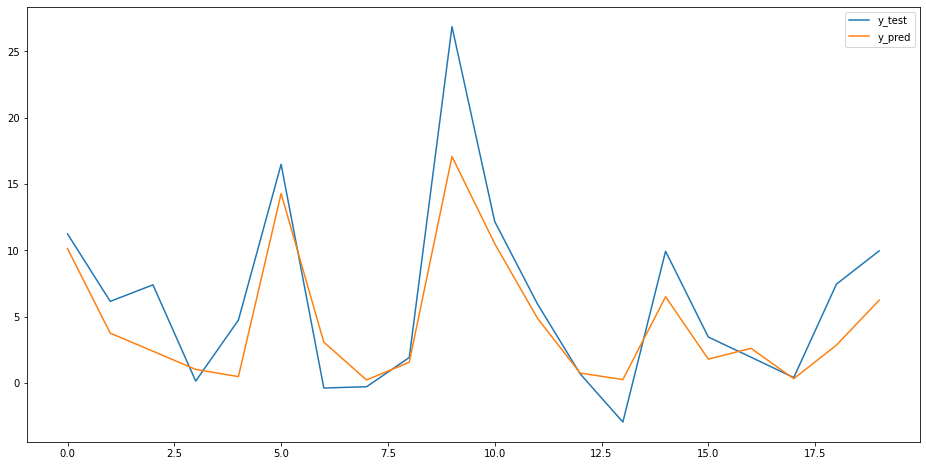

,0,1
0,11.235644,10.126733
1,6.144693,3.749208
2,7.392237,2.383812
3,0.131505,1.013520
4,4.731149,0.469263
5,16.486313,14.279499
6,-0.392616,3.063685
7,-0.295341,0.217711
8,1.911487,1.553486
9,26.867975,17.071102


,Categorical variable included,test_set_r2,test_set_mae,test_set_rmse,cv_r2_mean,cv_r2_std,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std
0,Nomination Date,0.446,12.593,3.549,0.437,1.184,5.640,3.639,4.021,2.044
1,Category,0.398,13.675,3.698,0.403,0.688,4.960,2.827,3.472,1.581
2,Nominated Supplier,0.825,3.974,1.993,0.643,0.787,4.154,3.314,2.878,1.607
3,Material Type,0.695,6.928,2.632,0.469,0.920,5.266,2.716,3.752,1.269
4,Hardness,0.838,3.682,1.919,0.608,1.211,5.058,3.841,3.528,2.117
5,Color,0.836,3.738,1.933,0.514,0.893,5.173,2.980,3.500,1.415
6,Material Spec,0.900,2.270,1.507,0.606,0.999,5.425,3.598,3.547,2.059
7,Dapso Mat. Number,0.497,11.422,3.380,0.429,1.197,5.949,2.052,4.196,0.696


In [350]:
#linear regression
stats_list=[]
for i in range(len(list_cat)):
    df_new = df_cable.iloc[:,:9].join(list_cat[i])
    x_data = df_new.iloc[:, :-2]
    y_data = df_cable.iloc[:, -1]

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=42)

    lin_reg_mod.fit(x_train,y_train)    
    lin_reg_pred = lin_reg_mod.predict(x_test) 

    test_set_mae = mean_squared_error(y_test, lin_reg_pred)
    test_set_rmse = (np.sqrt(mean_squared_error(y_test, lin_reg_pred)))
    test_set_r2 = r2_score(y_test, lin_reg_pred)
    print('Intercept: \n', lin_reg_mod.intercept_)
    print('Coefficients: \n', lin_reg_mod.coef_)
    cv_r2 = cross_val_score(lin_reg_mod, x_train, y_train, scoring='r2', cv=10)
    cv_rmse = cross_val_score(lin_reg_mod, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
    cv_mae = cross_val_score(lin_reg_mod, x_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    cv_r2_mean = np.mean(cv_r2[cv_r2>=0])
    cv_rmse_mean = -np.mean(cv_rmse)
    cv_mae_mean = -np.mean(cv_mae)
    cv_r2_std = np.std(cv_r2)
    cv_rmse_std = np.std(cv_rmse)
    cv_mae_std = np.std(cv_mae)
    stats_list.append([df_cable.columns[9:][i],test_set_r2,test_set_mae,test_set_rmse,cv_r2_mean,cv_r2_std,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std])
    plt.figure(figsize=(16,8))
    x_plot = np.arange(y_test.shape[0])
    plt.plot(x_plot,lin_reg_pred)
    plt.plot(x_plot,y_test)
    plt.legend(['y_test','y_pred'])
    plt.show()

    display(pd.DataFrame(zip(lin_reg_pred,y_test)))
column_list = ['Categorical variable included', 'test_set_r2', 'test_set_mae','test_set_rmse', 'cv_r2_mean','cv_r2_std','cv_rmse_mean','cv_rmse_std','cv_mae_mean','cv_mae_std']
df_stats = pd.DataFrame(stats_list, columns = column_list).round(3)
display(df_stats)

In [352]:
df_cable['Material Type'].unique()

array(['NBR+PVC', 'AEM', 'EPDM', 'NBR', 'FKM', 'VMQ', 'LS-EPDM',
       'EPDM Foam', 'VMQ - LSR', 'HNBR', 'EPDM foam'], dtype=object)

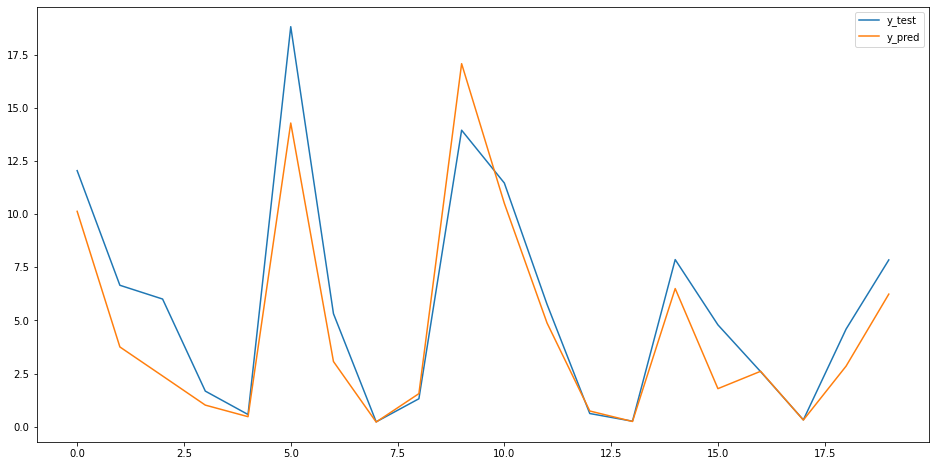

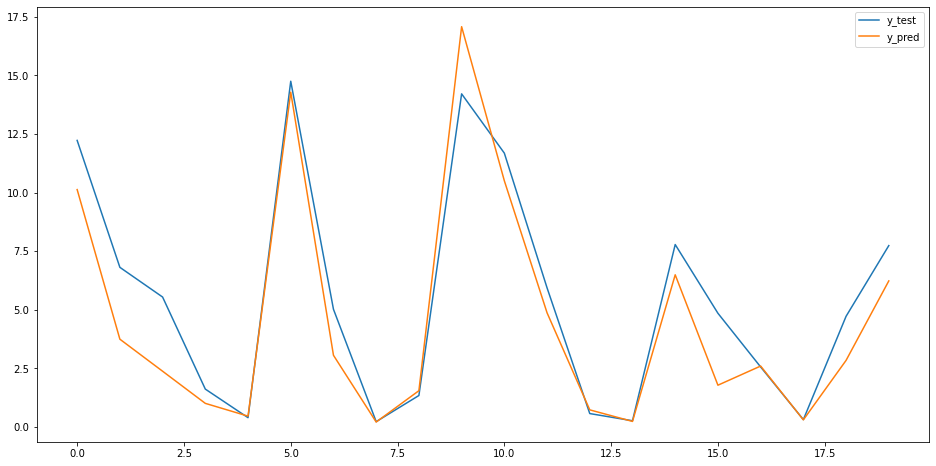

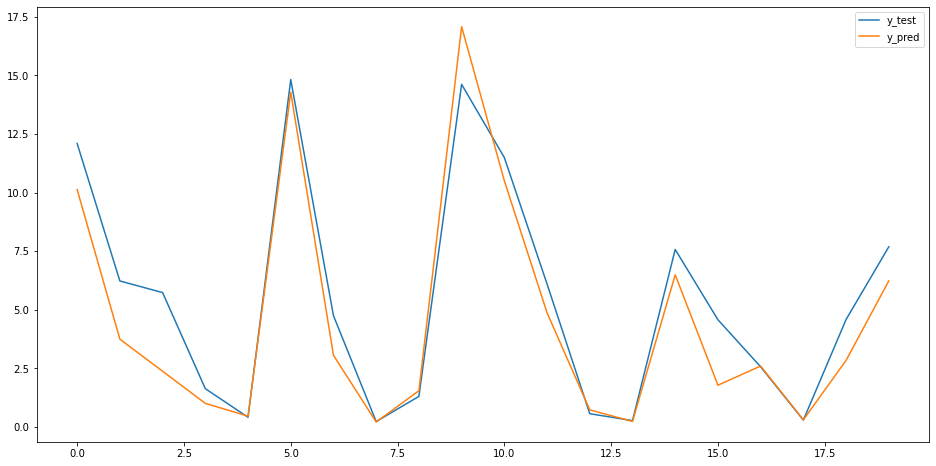

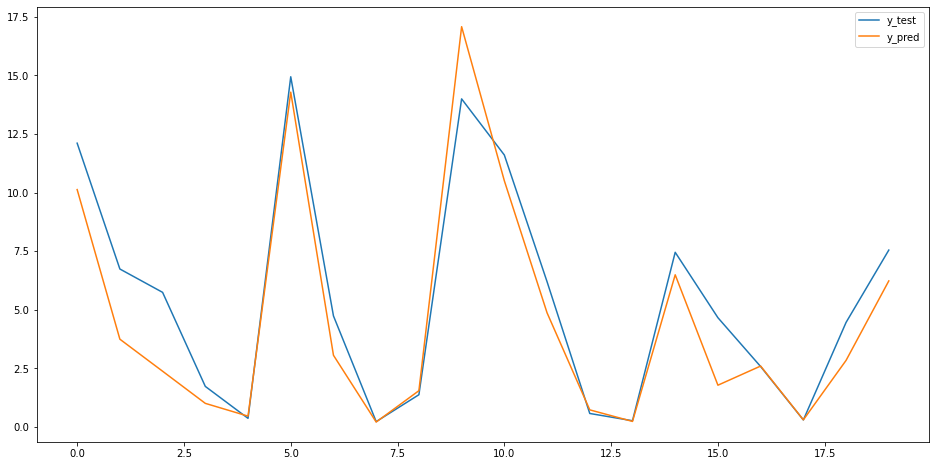

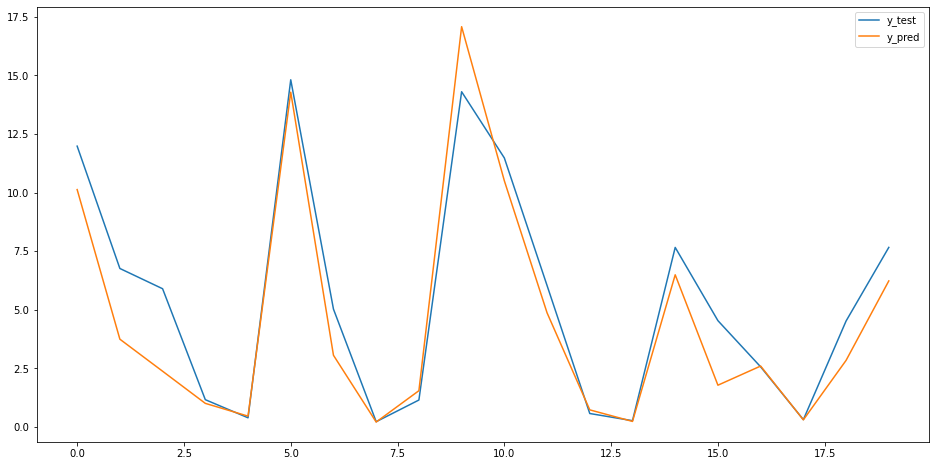

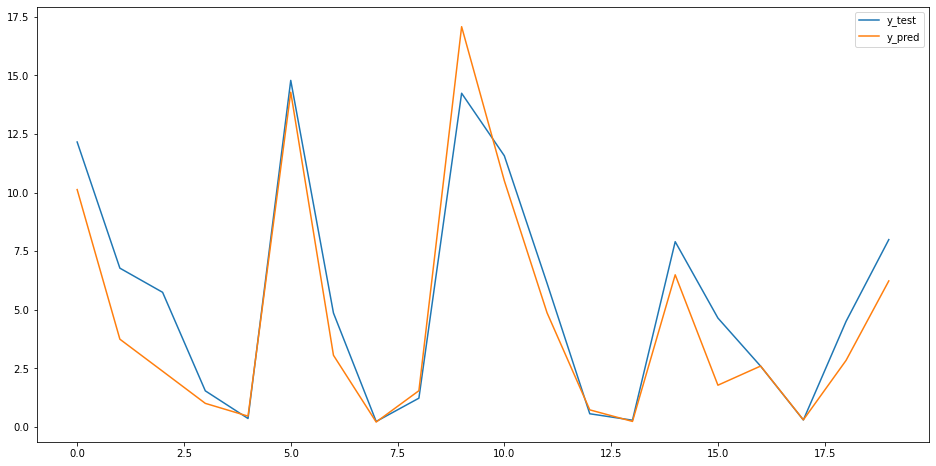

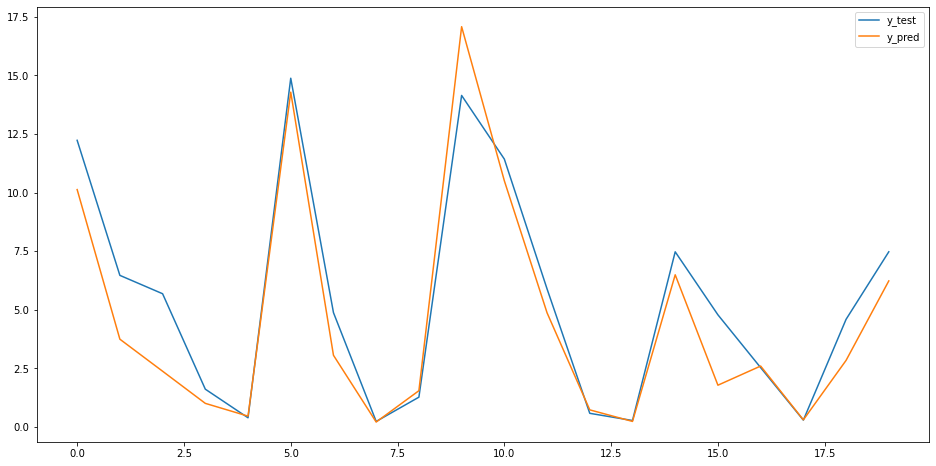

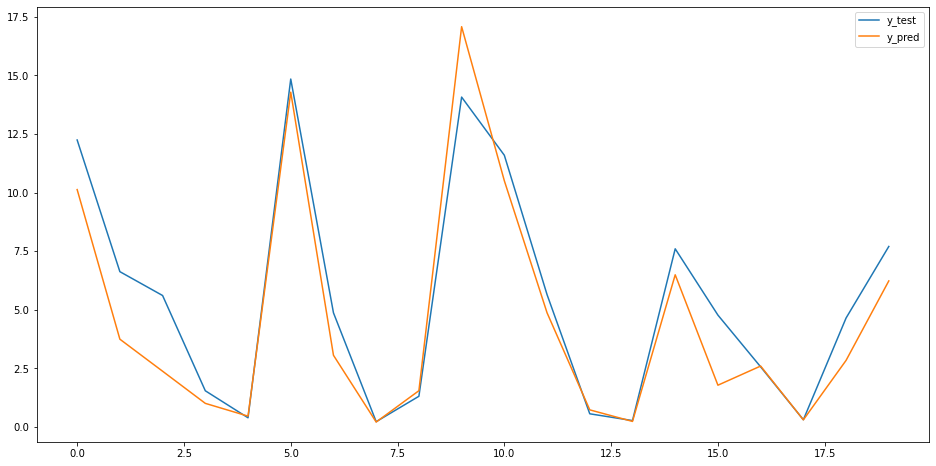

,Categorical variable included,test_set_r2,test_set_mae,test_set_rmse,cv_r2_mean,cv_r2_std,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std
0,Nomination Date,0.826,3.961,1.990,0.680,0.296,3.181,2.756,1.922,1.481
1,Category,0.877,2.793,1.671,0.748,0.197,3.020,2.746,1.868,1.473
2,Nominated Supplier,0.895,2.375,1.541,0.755,0.197,2.977,2.775,1.838,1.515
3,Material Type,0.881,2.699,1.643,0.739,0.205,3.053,2.775,1.879,1.510
4,Hardness,0.883,2.651,1.628,0.743,0.203,3.088,2.808,1.895,1.521
5,Color,0.878,2.768,1.664,0.746,0.202,3.034,2.783,1.856,1.497
6,Material Spec,0.886,2.595,1.611,0.722,0.201,3.204,2.758,1.948,1.484
7,Dapso Mat. Number,0.882,2.675,1.636,0.722,0.207,3.177,2.767,1.971,1.483


In [344]:
#random forest
stats_list=[]
for i in range(len(list_cat)):
    df_new = df_cable.iloc[:,:9].join(list_cat[i])
    x_data = df_new.iloc[:, :-2]
    y_data = df_cable.iloc[:, -1]

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=42)

    rfg_reg_mod.fit(x_train,y_train)    
    rfg_reg_pred = rfg_reg_mod.predict(x_test) 

    test_set_mae = mean_squared_error(y_test, rfg_reg_pred)
    test_set_rmse = (np.sqrt(mean_squared_error(y_test, rfg_reg_pred)))
    test_set_r2 = r2_score(y_test, rfg_reg_pred)
#     print('Intercept: \n', rfg_reg_mod.intercept_)
#     print('Coefficients: \n', rfg_reg_mod.coef_)
    cv_r2 = cross_val_score(rfg_reg_mod, x_train, y_train, scoring='r2', cv=10)
    cv_rmse = cross_val_score(rfg_reg_mod, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
    cv_mae = cross_val_score(rfg_reg_mod, x_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    cv_r2_mean = np.mean(cv_r2[cv_r2>=0])
    cv_rmse_mean = -np.mean(cv_rmse)
    cv_mae_mean = -np.mean(cv_mae)
    cv_r2_std = np.std(cv_r2)
    cv_rmse_std = np.std(cv_rmse)
    cv_mae_std = np.std(cv_mae)
    stats_list.append([df_cable.columns[9:][i],test_set_r2,test_set_mae,test_set_rmse,cv_r2_mean,cv_r2_std,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std])
    plt.figure(figsize=(16,8))
    x_plot = np.arange(y_test.shape[0])
    plt.plot(x_plot,rfg_reg_pred)
    plt.plot(x_plot,y_test)
    plt.legend(['y_test','y_pred'])
    plt.show()
column_list = ['Categorical variable included', 'test_set_r2', 'test_set_mae','test_set_rmse', 'cv_r2_mean','cv_r2_std','cv_rmse_mean','cv_rmse_std','cv_mae_mean','cv_mae_std']
df_stats = pd.DataFrame(stats_list, columns = column_list).round(3)
display(df_stats)

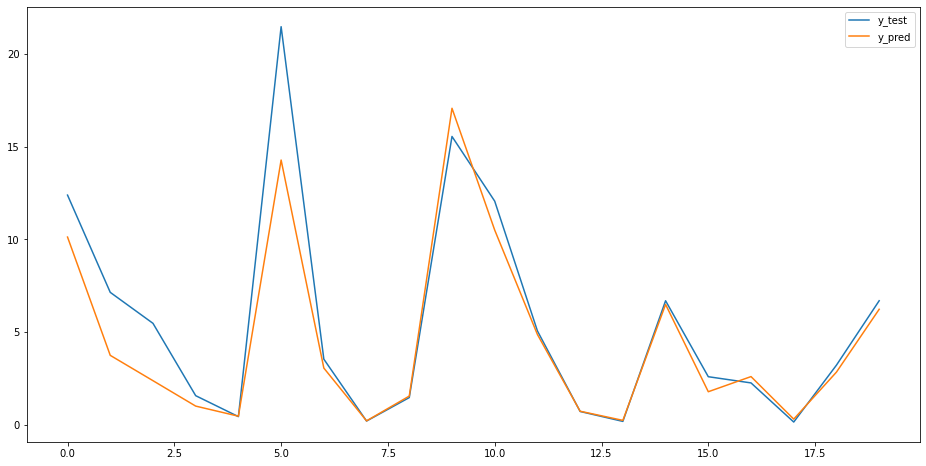

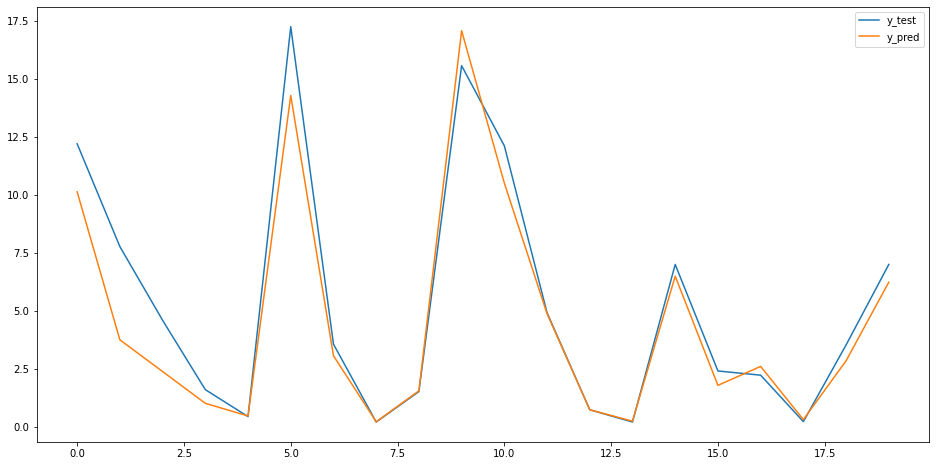

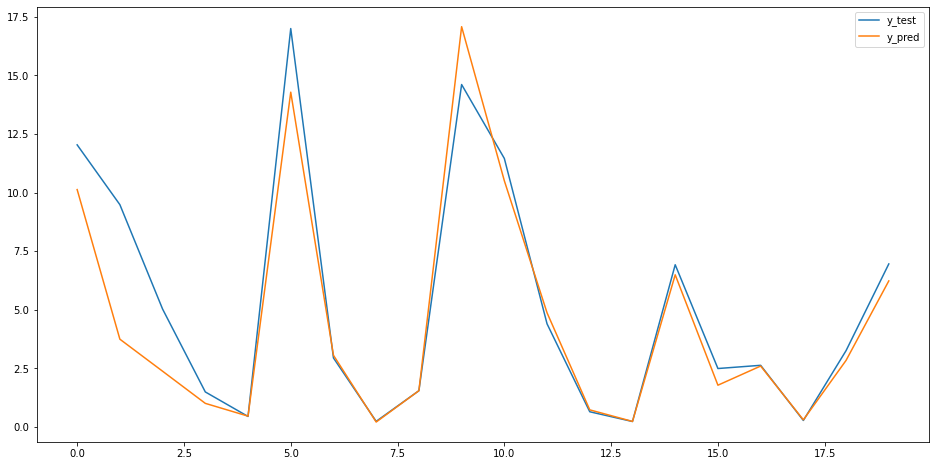

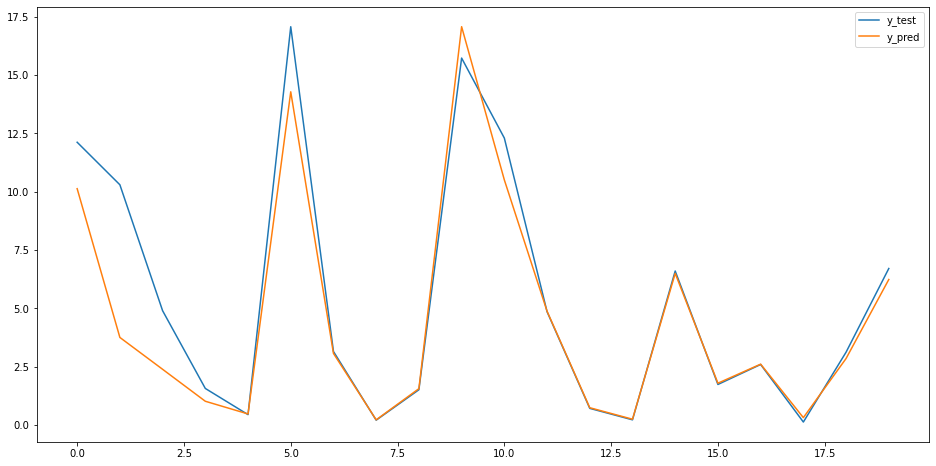

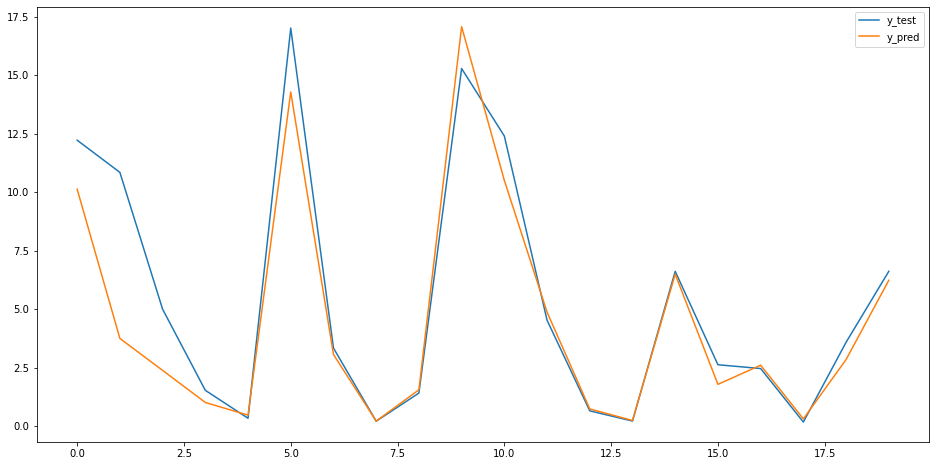

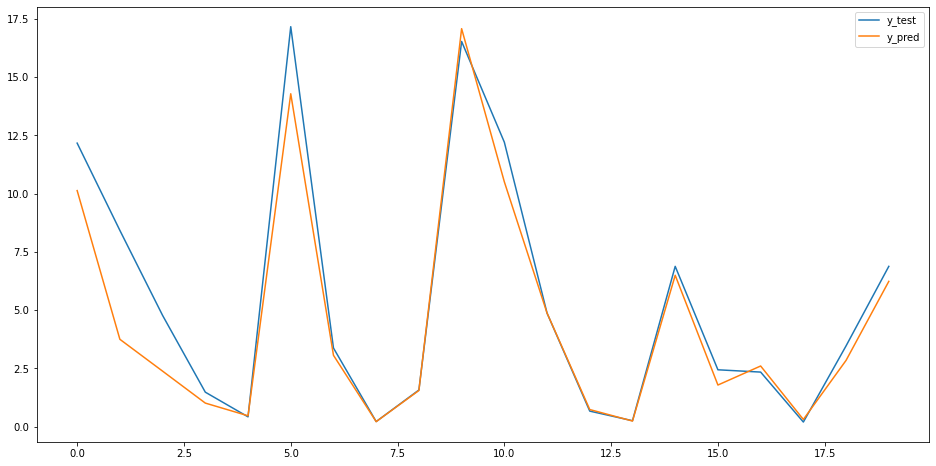

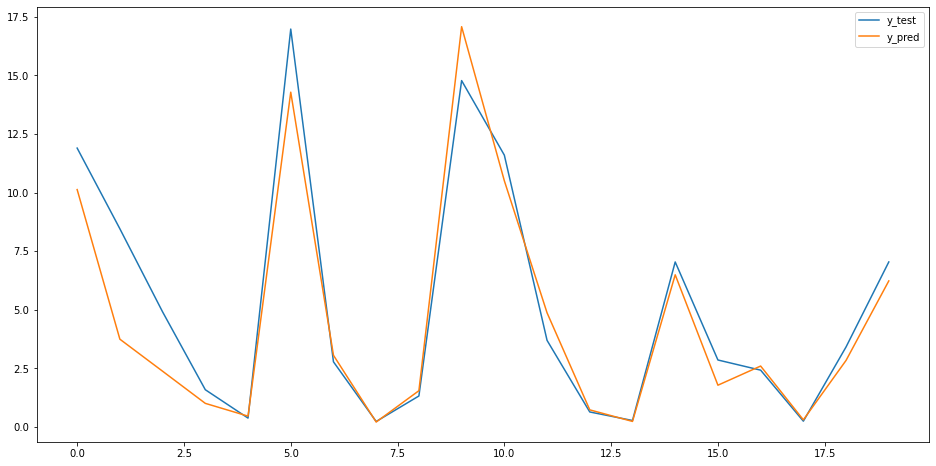

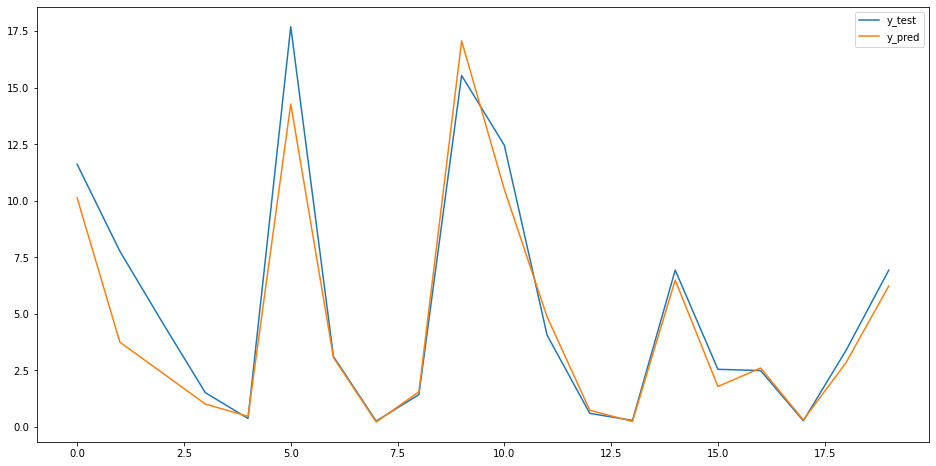

,Categorical variable included,test_set_r2,test_set_mae,test_set_rmse,cv_r2_mean,cv_r2_std,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std
0,Nomination Date,0.814,4.222,2.055,0.792,0.193,2.676,2.639,1.533,1.298
1,Category,0.909,2.069,1.438,0.832,0.181,2.428,2.694,1.404,1.304
2,Nominated Supplier,0.869,2.988,1.728,0.832,0.182,2.508,2.670,1.505,1.292
3,Material Type,0.854,3.329,1.825,0.831,0.181,2.462,2.723,1.467,1.337
4,Hardness,0.829,3.890,1.972,0.811,0.200,2.589,2.731,1.512,1.312
5,Color,0.901,2.246,1.499,0.831,0.182,2.460,2.669,1.439,1.310
6,Material Spec,0.891,2.486,1.577,0.802,0.198,2.687,2.746,1.564,1.397
7,Dapso Mat. Number,0.904,2.184,1.478,0.820,0.201,2.518,2.800,1.505,1.412


In [345]:
#gradient boosting
stats_list=[]
for i in range(len(list_cat)):
    df_new = df_cable.iloc[:,:9].join(list_cat[i])
    x_data = df_new.iloc[:, :-2]
    y_data = df_cable.iloc[:, -1]

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=42)

    gbr_reg_mod.fit(x_train,y_train)    
    gbr_reg_pred = gbr_reg_mod.predict(x_test) 

    test_set_mae = mean_squared_error(y_test, gbr_reg_pred)
    test_set_rmse = (np.sqrt(mean_squared_error(y_test, gbr_reg_pred)))
    test_set_r2 = r2_score(y_test, gbr_reg_pred)
#     print('Intercept: \n', gbr_reg_mod.intercept_)
#     print('Coefficients: \n', gbr_reg_mod.coef_)
    cv_r2 = cross_val_score(gbr_reg_mod, x_train, y_train, scoring='r2', cv=10)
    cv_rmse = cross_val_score(gbr_reg_mod, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
    cv_mae = cross_val_score(gbr_reg_mod, x_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    cv_r2_mean = np.mean(cv_r2[cv_r2>=0])
    cv_rmse_mean = -np.mean(cv_rmse)
    cv_mae_mean = -np.mean(cv_mae)
    cv_r2_std = np.std(cv_r2)
    cv_rmse_std = np.std(cv_rmse)
    cv_mae_std = np.std(cv_mae)
    stats_list.append([df_cable.columns[9:][i],test_set_r2,test_set_mae,test_set_rmse,cv_r2_mean,cv_r2_std,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std])
    plt.figure(figsize=(16,8))
    x_plot = np.arange(y_test.shape[0])
    plt.plot(x_plot,gbr_reg_pred)
    plt.plot(x_plot,y_test)
    plt.legend(['y_test','y_pred'])
    plt.show()
column_list = ['Categorical variable included', 'test_set_r2', 'test_set_mae','test_set_rmse', 'cv_r2_mean','cv_r2_std','cv_rmse_mean','cv_rmse_std','cv_mae_mean','cv_mae_std']
df_stats = pd.DataFrame(stats_list, columns = column_list).round(3)
display(df_stats)